In [1]:
%matplotlib notebook
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
import mre_pinn

torch.cuda.is_available()

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.
C:\miniforge3\envs\MRE-PINN\lib\site-packages\ufl\__init__.py:245: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


PINN training will work normally. Only FEM baseline comparisons are disabled.


False

Download the BIOQIC simulation data set and convert it to xarray format.

In [3]:
bioqic = mre_pinn.data.BIOQICFEMBox('../data/BIOQIC/downloads')
bioqic.download()
bioqic.load_mat()
bioqic.preprocess()
dataset = bioqic.to_dataset()
dataset.save_xarrays('../data/BIOQIC/fem_box')

Loading ..\data\BIOQIC\downloads\four_target_phantom.mat
    __header__: <class 'bytes'>
    __version__: <class 'str'>
    __globals__: <class 'list'>
    u_ft: <class 'numpy.ndarray'> (100, 80, 10, 3, 6) complex128
<xarray.Dataset> Size: 23MB
Dimensions:    (frequency: 6, x: 80, y: 100, z: 10, component: 3)
Coordinates:
  * frequency  (frequency) int32 24B 50 60 70 80 90 100
  * x          (x) float64 640B 0.0 0.001 0.002 0.003 ... 0.077 0.078 0.079
  * y          (y) float64 800B 0.0 0.001 0.002 0.003 ... 0.097 0.098 0.099
  * z          (z) float64 80B 0.0 0.001 0.002 0.003 ... 0.006 0.007 0.008 0.009
  * component  (component) <U1 12B 'y' 'x' 'z'
Data variables:
    wave       (frequency, x, y, z, component) complex128 23MB (0.00180392876...
Segmenting spatial regions
Creating ground truth elastogram
Writing ..\data\BIOQIC\fem_box\50\wave.nc
Writing ..\data\BIOQIC\fem_box\50\mre.nc
Writing ..\data\BIOQIC\fem_box\50\mre_mask.nc
Writing ..\data\BIOQIC\fem_box\60\wave.nc
Writing ..\d

Visualize the wave field and display spatial metadata and descriptive statistics. Note that the z component of the wave field has the highest displacement amplitude. You can view the different components by adjusting the component slider.

Loading ..\data\BIOQIC\fem_box\90\wave.nc
Loading ..\data\BIOQIC\fem_box\90\mre.nc
Loading ..\data\BIOQIC\fem_box\90\mre_mask.nc


<IPython.core.display.Javascript object>


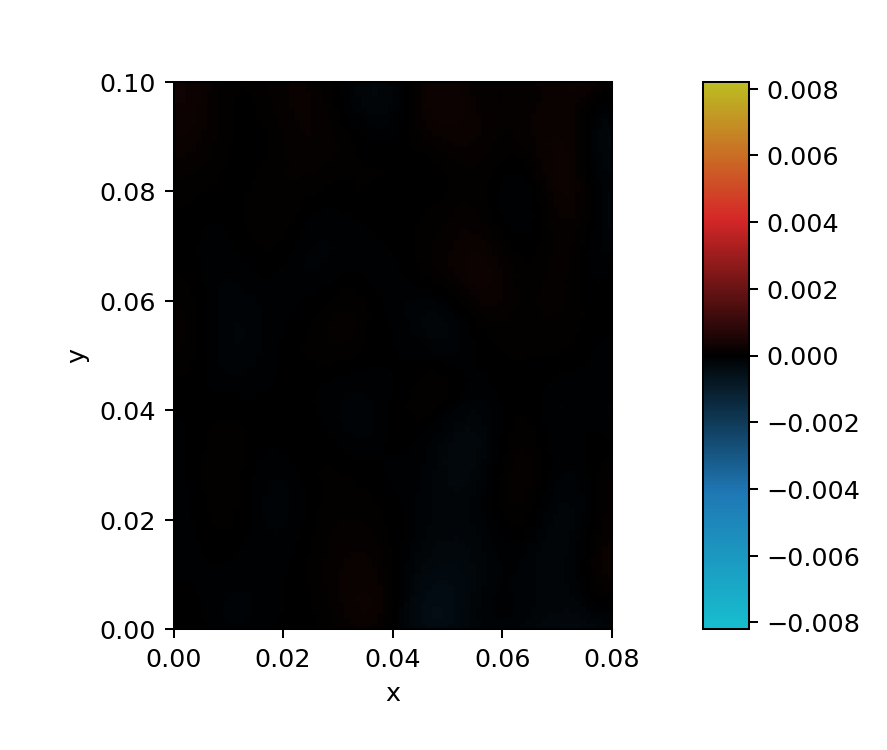

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [4]:
frequency = 90 # Hz
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/fem_box', frequency)
example.view('wave', ax_height=3)

In [5]:
example.metadata

size  spacing  \
variable dimension                  
wave     x            80    0.001   
         y           100    0.001   
         z            10    0.001   
mre      x            80    0.001   
         y           100    0.001   
         z            10    0.001   
mre_mask x            80    0.001   
         y           100    0.001   
         z            10    0.001   

                                                               origin  \
variable dimension                                                      
wave     x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.)\...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.)\...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.)\...   
mre      x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.)\...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.)\...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.)\...   
mre_mask x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.)\...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.)\...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.)\...   

                                                                limit  \
variable dimension                                                      
wave     x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.07...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.09...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...   
mre      x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.07...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.09...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...   
mre_mask x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.07...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.09...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...   

                                                               center  \
variable dimension                                                      
wave     x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.03...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.04...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...   
mre      x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.03...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.04...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...   
mre_mask x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.03...   
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.04...   
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...   

                                                               extent  
variable dimension                                                     
wave     x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.08...  
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.1)...  
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.01...  
mre      x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.08...  
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.1)...  
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.01...  
mre_mask x          <xarray.DataArray 'x' ()> Size: 8B\narray(0.08...  
         y          <xarray.DataArray 'y' ()> Size: 8B\narray(0.1)...  
         z          <xarray.DataArray 'z' ()> Size: 8B\narray(0.01...

In [6]:
example.describe()

dtype    count                      mean  \
variable component                                                  
wave     y          complex128  80000.0    -0.000001-   0.000005j   
         x          complex128  80000.0     0.000079-   0.000073j   
         z          complex128  80000.0    -0.000287-   0.000249j   
mre      scalar     complex128  80000.0  3382.375000+ 565.486678j   
mre_mask scalar          int32  80000.0     1.076500+   0.000000j   

                            std                       min  \
variable component                                          
wave     y             0.000241    -0.000499-   0.000196j   
         x             0.000346    -0.000905+   0.000477j   
         z             0.004918    -0.011268-   0.002122j   
mre      scalar     1590.727619  3000.000000+ 565.486678j   
mre_mask scalar        0.362143     1.000000+   0.000000j   

                                         25%  \
variable component                             
wave     y            -0.000058+   0.000031j   
         x            -0.000015-   0.000234j   
         z            -0.002060-   0.001419j   
mre      scalar     3000.000000+ 565.486678j   
mre_mask scalar        1.000000+   0.000000j   

                                                               50%  \
variable component                                                   
wave     y         -2.027842e-06+1.385699e-                    07j   
         x          6.278027e-05+1.562524e-                    05j   
         z         -7.380324e-12-7.602312e-                    11j   
mre      scalar     3.000000e+03+5.654867e+                    02j   
mre_mask scalar     1.000000e+00+0.000000e+                    00j   

                                         75%                         max  
variable component                                                        
wave     y             0.000062-   0.000136j      0.000474+    0.000099j  
         x             0.000169-   0.000225j      0.001094-    0.000011j  
         z             0.001818-   0.001513j      0.008730+    0.001950j  
mre      scalar     3000.000000+ 565.486678j  10000.000000+  565.486678j  
mre_mask scalar        1.000000+   0.000000j      5.000000+    0.000000j

Visualize ground truth elasticity map along with AHI and FEM-based elasticity reconstruction methods.

Evaluating direct baseline


<IPython.core.display.Javascript object>


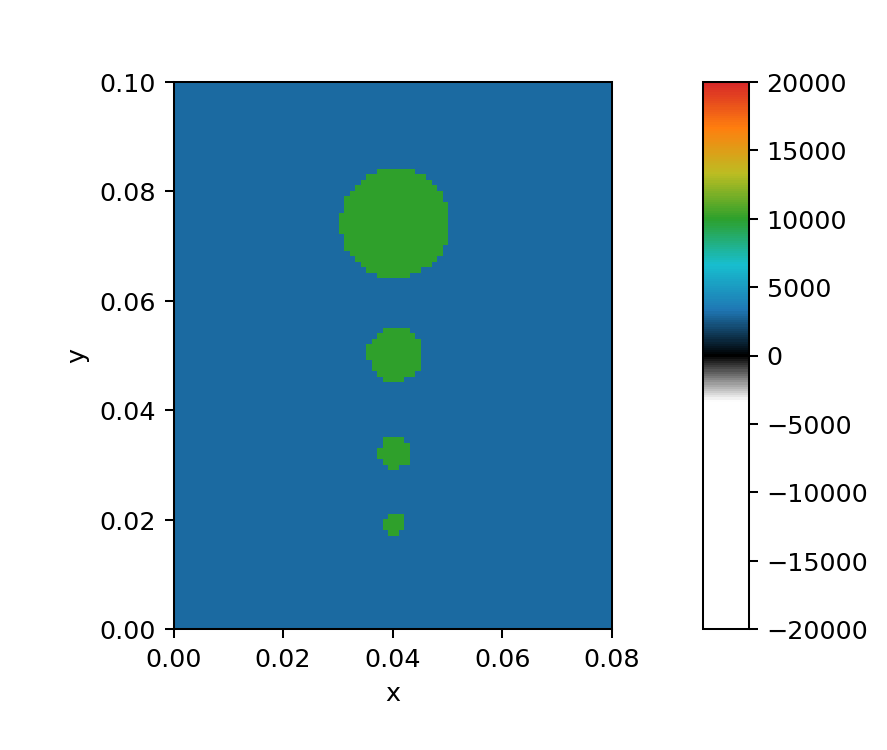

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


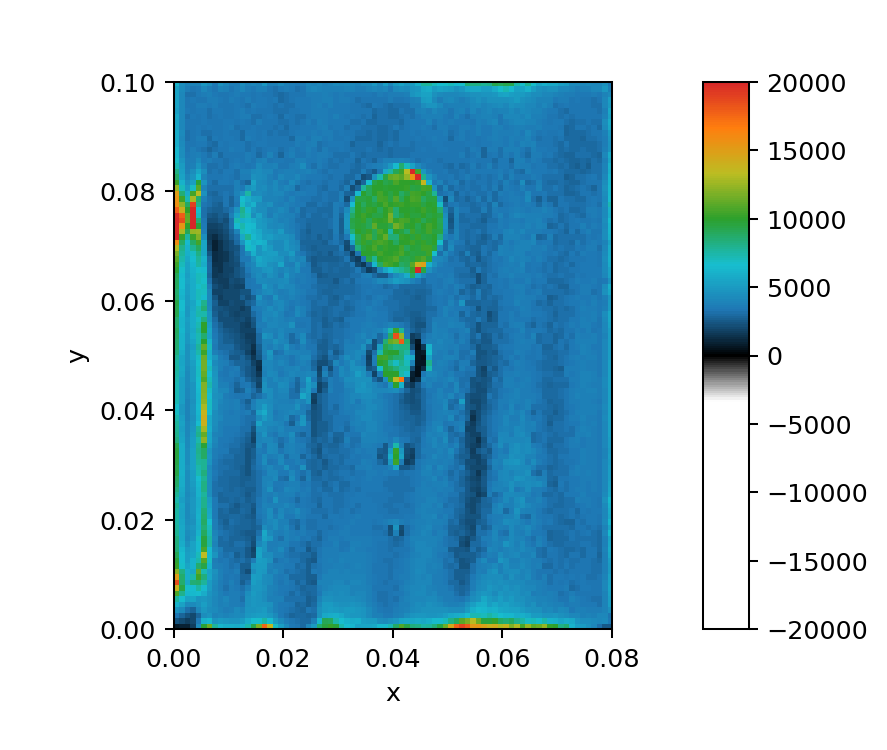

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [7]:
mre_pinn.baseline.eval_ahi_baseline(example, frequency=frequency)
#mre_pinn.baseline.eval_fem_baseline(example, frequency=frequency, hetero=False)
example.view('mre', 'direct', ax_height=3, polar=True, vmax=20e3)

Construct the PDE and PINN architecture that will be used to solve it.

In [8]:
pde = mre_pinn.pde.WaveEquation.from_name('hetero', omega=frequency)

In [9]:
# Check what's in the metadata
print(example.metadata['center'])
print(type(example.metadata['center'].wave.values))
print(example.metadata['center'].wave.values)

variable  dimension
wave      x            <xarray.DataArray 'x' ()> Size: 8B\narray(0.03...
          y            <xarray.DataArray 'y' ()> Size: 8B\narray(0.04...
          z            <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...
mre       x            <xarray.DataArray 'x' ()> Size: 8B\narray(0.03...
          y            <xarray.DataArray 'y' ()> Size: 8B\narray(0.04...
          z            <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...
mre_mask  x            <xarray.DataArray 'x' ()> Size: 8B\narray(0.03...
          y            <xarray.DataArray 'y' ()> Size: 8B\narray(0.04...
          z            <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...
Lu        x            <xarray.DataArray 'x' ()> Size: 8B\narray(0.03...
          y            <xarray.DataArray 'y' ()> Size: 8B\narray(0.04...
          z            <xarray.DataArray 'z' ()> Size: 8B\narray(0.00...
direct    x            <xarray.DataArray 'x' ()> Size: 8B\narray(0.03...
          y            <xarray.

In [10]:
pinn = mre_pinn.model.MREPINN(
    example,
    omega=60,
    n_layers=5,
    n_hidden=128,
    activ_fn='ss', # sin
    polar_input=False
)
pinn

C:\Users\Yeshwanth Kesav\Desktop\MRE-PINN\MICCAI-2023\..\mre_pinn\model\pinn.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.u_loc = torch.tensor(stats['mean'].wave)
C:\Users\Yeshwanth Kesav\Desktop\MRE-PINN\MICCAI-2023\..\mre_pinn\model\pinn.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.u_scale = torch.tensor(stats['std'].wave)
C:\Users\Yeshwanth Kesav\Desktop\MRE-PINN\MICCAI-2023\..\mre_pinn\model\pinn.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

MREPINN(
  (u_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=6, bias=True)
  )
  (mu_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=2, bias=True)
  )
)

Compile the PINN model and specify training hyperparameters.

In [13]:
model = mre_pinn.training.MREPINNModel(
    example, pinn, pde,
    loss_weights=[1, 0, 0, 1e-8],
    pde_warmup_iters=10000,
    pde_step_iters=5000,
    pde_step_factor=10,
    pde_init_weight=1e-10,
    n_points=1024,
    device = 'cpu'
)
model.compile(optimizer='adam', lr=1e-4, loss=mre_pinn.training.losses.msae_loss)

Compiling model...
'compile' took 0.000344 s



Perform model forward-backward pass benchmarking to estimate training time.

In [15]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(3)

# iterations: 3
Data time/iter:  0.0082s (0.46%)
Model time/iter: 0.0193s (1.10%)
Loss time/iter:  1.7370s (98.44%)
Total time/iter: 1.7645s
Total time: 5.2935s
1k iters time: 29.41m
10k iters time: 294.08m
100k iters time: 49.01h


Create test evaluator that will be used to periodically evaluate and visualize model output on full spatial domain. The visualizers should update automatically once the training loop begins. Note that the interactive sliders can be used to adjust what slice of the images are visualized, but these do not work while the training loop is running.

In [16]:
test_eval = mre_pinn.testing.TestEvaluator(test_every=1000, save_every=10000, save_prefix='DEMO', interact=True)
test_eval.model = model
test_eval.test()

AttributeError: 'MREExample' object has no attribute 'fem'

Run the training loop.

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [6.57e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.62e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  


<IPython.core.display.Javascript object>


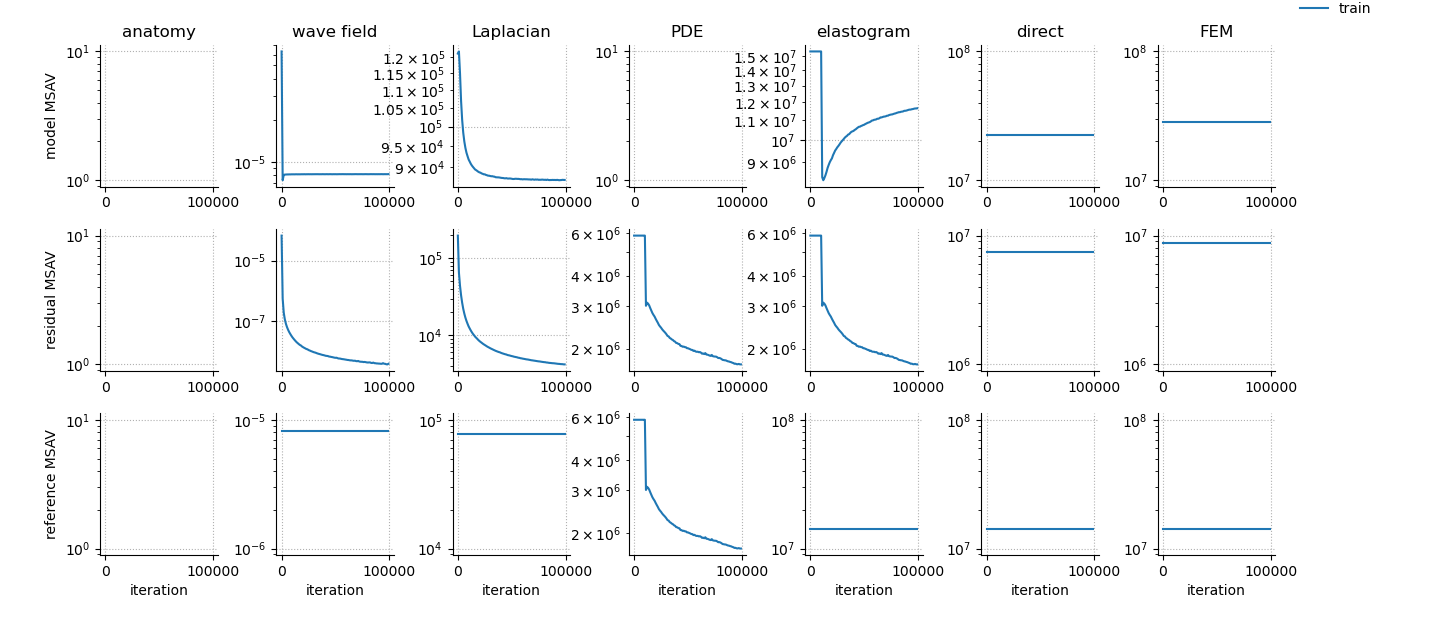

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



<IPython.core.display.Javascript object>


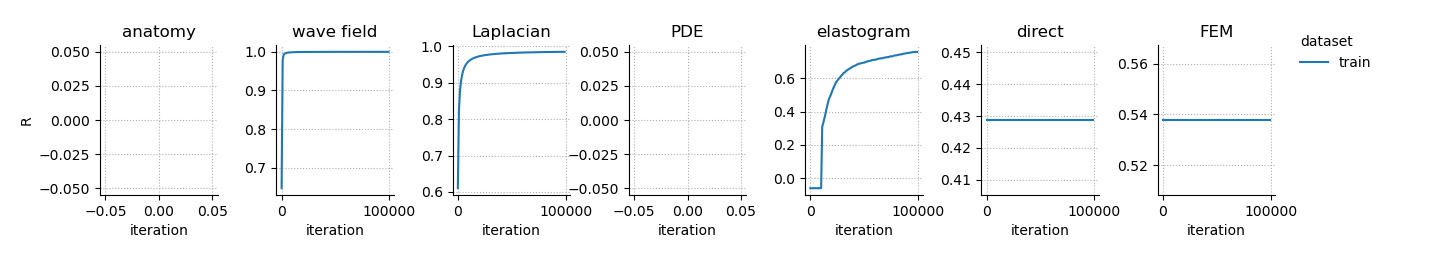

<IPython.core.display.Javascript object>


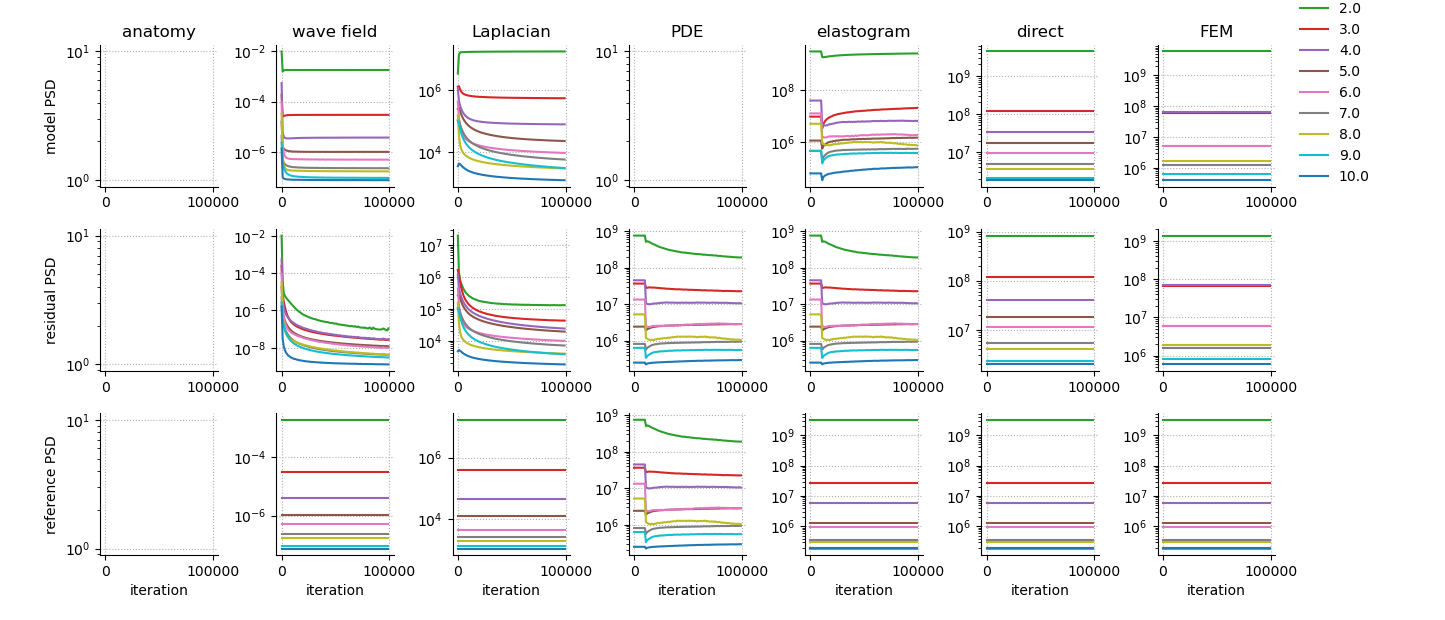

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



<IPython.core.display.Javascript object>


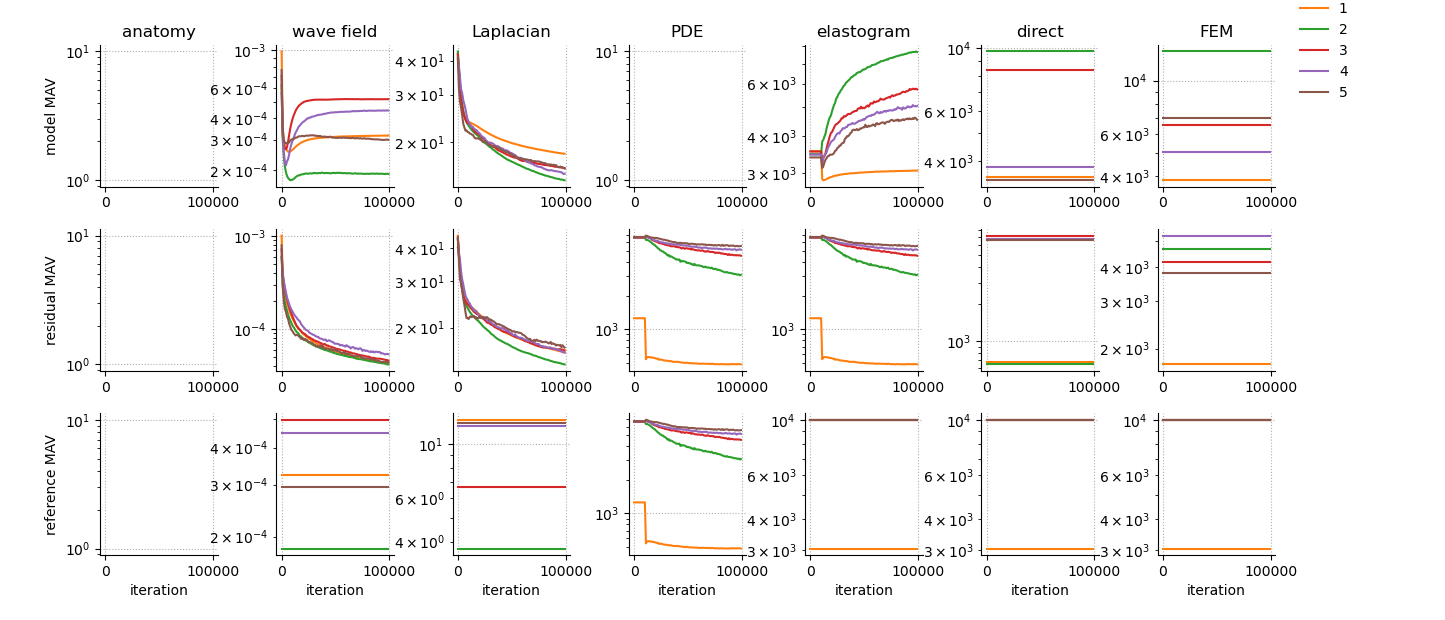

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



Time spent testing: 31.6565 (19.95%)
100       [1.18e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.19e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
200       [6.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
300       [4.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
400       [2.95e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.91e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
500       [2.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
600       [1.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
700       [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
800       [8.39e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.45e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
900       [6.80e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.61e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [5.46e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5196 (23.55%)
1100      [4.45e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.49e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1200      [3.99e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [3.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1300      [3.35e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [3.35e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1400      [3.29e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [3.01e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1500      [2.79e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [2.73e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1600      [2.46e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [2.50e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1700      [2.25e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [2.27e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1800      [2.22e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [2.09e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1900      [1.98e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.96e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2000      [1.86e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5690 (25.21%)
2100      [1.83e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.72e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2200      [1.74e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2300      [1.64e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2400      [1.42e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.44e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2500      [1.37e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.37e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2600      [1.32e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.30e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2700      [1.23e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.24e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2800      [1.19e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.18e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2900      [1.14e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.14e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3000      [1.12e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6310 (26.16%)
3100      [1.00e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.06e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3200      [1.02e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.02e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3300      [1.02e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.77e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3400      [9.53e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [9.42e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3500      [9.26e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [9.14e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3600      [8.98e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [8.79e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3700      [8.50e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [8.50e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3800      [7.98e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [8.32e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3900      [8.22e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [8.00e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4000      [7.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7288 (26.82%)
4100      [7.85e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [7.55e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4200      [7.34e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [7.37e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4300      [7.77e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [7.18e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4400      [7.17e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [7.01e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4500      [7.06e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [6.81e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4600      [6.61e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [6.62e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4700      [6.79e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [6.46e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4800      [6.55e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [6.31e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4900      [6.56e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [6.16e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5000      [6.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6445 (27.28%)
5100      [6.28e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.92e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5200      [5.72e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.79e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5300      [5.87e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.67e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5400      [5.50e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.57e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5500      [5.58e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.42e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5600      [5.26e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.30e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5700      [5.10e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.21e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5800      [5.01e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.13e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5900      [5.11e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [5.02e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6000      [5.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5753 (27.58%)
6100      [5.00e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.84e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6200      [4.86e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.73e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6300      [4.71e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.65e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6400      [4.72e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.59e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6500      [4.74e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.51e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6600      [4.43e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.42e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6700      [4.33e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.36e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6800      [4.14e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.30e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
6900      [4.43e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.26e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7000      [4.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6635 (27.85%)
7100      [4.09e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.10e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7200      [4.08e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [4.04e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7300      [4.04e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.96e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7400      [3.96e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.91e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7500      [3.80e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.80e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7600      [3.87e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.79e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7700      [3.71e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.74e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7800      [3.69e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.69e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
7900      [3.74e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.61e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8000      [3.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.1765 (28.00%)
8100      [3.59e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.51e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8200      [3.55e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.47e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8300      [3.46e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.40e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8400      [3.48e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.37e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8500      [3.26e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.35e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8600      [3.28e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.32e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8700      [3.25e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.22e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8800      [3.14e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.18e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
8900      [3.10e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.17e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9000      [3.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5954 (28.17%)
9100      [3.11e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.09e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9200      [3.16e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.08e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9300      [3.01e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.03e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9400      [3.06e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [3.01e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9500      [2.92e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [2.97e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9600      [2.99e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [2.91e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9700      [2.78e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [2.84e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9800      [2.95e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [2.83e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
9900      [2.94e-08, 0.00e+00, 0.00e+00, 0.00e+00]    [2.79e-08, 0.00e+00, 0.00e+00, 0.00e+00]    []  
10000     [2.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7372 (28.32%)
10100     [2.74e-08, 0.00e+00, 0.00e+00, 1.28e+01]    [2.75e-08, 0.00e+00, 0.00e+00, 1.39e+01]    []  
10200     [2.74e-08, 0.00e+00, 0.00e+00, 1.04e+01]    [2.72e-08, 0.00e+00, 0.00e+00, 1.19e+01]    []  
10300     [2.68e-08, 0.00e+00, 0.00e+00, 9.67e+00]    [2.69e-08, 0.00e+00, 0.00e+00, 1.09e+01]    []  
10400     [2.67e-08, 0.00e+00, 0.00e+00, 9.11e+00]    [2.68e-08, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10500     [2.67e-08, 0.00e+00, 0.00e+00, 8.49e+00]    [2.62e-08, 0.00e+00, 0.00e+00, 9.55e+00]    []  
10600     [2.42e-08, 0.00e+00, 0.00e+00, 8.57e+00]    [2.58e-08, 0.00e+00, 0.00e+00, 9.37e+00]    []  
10700     [2.65e-08, 0.00e+00, 0.00e+00, 7.99e+00]    [2.58e-08, 0.00e+00, 0.00e+00, 8.61e+00]    []  
10800     [2.48e-08, 0.00e+00, 0.00e+00, 8.24e+00]    [2.54e-08, 0.00e+00, 0.00e+00, 8.62e+00]    []  
10900     [2.54e-08, 0.00e+00, 0.00e+00, 7.72e+00]    [2.49e-08, 0.00e+00, 0.00e+00, 8.34e+00]    []  
11000     [2.45e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.2350 (28.41%)
11100     [2.57e-08, 0.00e+00, 0.00e+00, 7.27e+00]    [2.47e-08, 0.00e+00, 0.00e+00, 7.97e+00]    []  
11200     [2.49e-08, 0.00e+00, 0.00e+00, 7.27e+00]    [2.44e-08, 0.00e+00, 0.00e+00, 7.77e+00]    []  
11300     [2.50e-08, 0.00e+00, 0.00e+00, 7.10e+00]    [2.42e-08, 0.00e+00, 0.00e+00, 7.47e+00]    []  
11400     [2.33e-08, 0.00e+00, 0.00e+00, 6.85e+00]    [2.40e-08, 0.00e+00, 0.00e+00, 7.36e+00]    []  
11500     [2.37e-08, 0.00e+00, 0.00e+00, 7.19e+00]    [2.36e-08, 0.00e+00, 0.00e+00, 7.28e+00]    []  
11600     [2.34e-08, 0.00e+00, 0.00e+00, 6.35e+00]    [2.33e-08, 0.00e+00, 0.00e+00, 7.18e+00]    []  
11700     [2.33e-08, 0.00e+00, 0.00e+00, 6.42e+00]    [2.33e-08, 0.00e+00, 0.00e+00, 6.94e+00]    []  
11800     [2.33e-08, 0.00e+00, 0.00e+00, 6.56e+00]    [2.31e-08, 0.00e+00, 0.00e+00, 6.90e+00]    []  
11900     [2.38e-08, 0.00e+00, 0.00e+00, 6.52e+00]    [2.27e-08, 0.00e+00, 0.00e+00, 6.79e+00]    []  
12000     [2.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5362 (28.51%)
12100     [2.36e-08, 0.00e+00, 0.00e+00, 6.17e+00]    [2.23e-08, 0.00e+00, 0.00e+00, 6.54e+00]    []  
12200     [2.21e-08, 0.00e+00, 0.00e+00, 6.28e+00]    [2.23e-08, 0.00e+00, 0.00e+00, 6.51e+00]    []  
12300     [2.21e-08, 0.00e+00, 0.00e+00, 5.85e+00]    [2.20e-08, 0.00e+00, 0.00e+00, 6.40e+00]    []  
12400     [2.18e-08, 0.00e+00, 0.00e+00, 6.54e+00]    [2.18e-08, 0.00e+00, 0.00e+00, 6.37e+00]    []  
12500     [2.23e-08, 0.00e+00, 0.00e+00, 6.07e+00]    [2.15e-08, 0.00e+00, 0.00e+00, 6.23e+00]    []  
12600     [2.21e-08, 0.00e+00, 0.00e+00, 5.87e+00]    [2.15e-08, 0.00e+00, 0.00e+00, 6.18e+00]    []  
12700     [2.14e-08, 0.00e+00, 0.00e+00, 5.90e+00]    [2.11e-08, 0.00e+00, 0.00e+00, 6.04e+00]    []  
12800     [2.06e-08, 0.00e+00, 0.00e+00, 5.91e+00]    [2.10e-08, 0.00e+00, 0.00e+00, 6.07e+00]    []  
12900     [2.14e-08, 0.00e+00, 0.00e+00, 5.74e+00]    [2.08e-08, 0.00e+00, 0.00e+00, 6.01e+00]    []  
13000     [2.07e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.8562 (28.62%)
13100     [2.09e-08, 0.00e+00, 0.00e+00, 5.35e+00]    [2.04e-08, 0.00e+00, 0.00e+00, 5.82e+00]    []  
13200     [2.09e-08, 0.00e+00, 0.00e+00, 5.25e+00]    [2.02e-08, 0.00e+00, 0.00e+00, 5.82e+00]    []  
13300     [1.98e-08, 0.00e+00, 0.00e+00, 5.48e+00]    [2.01e-08, 0.00e+00, 0.00e+00, 5.71e+00]    []  
13400     [2.05e-08, 0.00e+00, 0.00e+00, 5.62e+00]    [2.02e-08, 0.00e+00, 0.00e+00, 5.65e+00]    []  
13500     [2.04e-08, 0.00e+00, 0.00e+00, 5.41e+00]    [1.97e-08, 0.00e+00, 0.00e+00, 5.61e+00]    []  
13600     [1.92e-08, 0.00e+00, 0.00e+00, 5.54e+00]    [1.94e-08, 0.00e+00, 0.00e+00, 5.62e+00]    []  
13700     [1.97e-08, 0.00e+00, 0.00e+00, 5.61e+00]    [1.92e-08, 0.00e+00, 0.00e+00, 5.57e+00]    []  
13800     [1.93e-08, 0.00e+00, 0.00e+00, 5.47e+00]    [1.95e-08, 0.00e+00, 0.00e+00, 5.45e+00]    []  
13900     [1.92e-08, 0.00e+00, 0.00e+00, 5.44e+00]    [1.92e-08, 0.00e+00, 0.00e+00, 5.46e+00]    []  
14000     [1.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6007 (28.76%)
14100     [1.85e-08, 0.00e+00, 0.00e+00, 5.34e+00]    [1.89e-08, 0.00e+00, 0.00e+00, 5.38e+00]    []  
14200     [1.86e-08, 0.00e+00, 0.00e+00, 4.92e+00]    [1.88e-08, 0.00e+00, 0.00e+00, 5.41e+00]    []  
14300     [1.82e-08, 0.00e+00, 0.00e+00, 5.20e+00]    [1.86e-08, 0.00e+00, 0.00e+00, 5.35e+00]    []  
14400     [1.73e-08, 0.00e+00, 0.00e+00, 5.06e+00]    [1.82e-08, 0.00e+00, 0.00e+00, 5.22e+00]    []  
14500     [1.81e-08, 0.00e+00, 0.00e+00, 5.14e+00]    [1.82e-08, 0.00e+00, 0.00e+00, 5.21e+00]    []  
14600     [1.84e-08, 0.00e+00, 0.00e+00, 5.06e+00]    [1.80e-08, 0.00e+00, 0.00e+00, 5.16e+00]    []  
14700     [1.78e-08, 0.00e+00, 0.00e+00, 5.16e+00]    [1.79e-08, 0.00e+00, 0.00e+00, 5.12e+00]    []  
14800     [1.76e-08, 0.00e+00, 0.00e+00, 4.85e+00]    [1.78e-08, 0.00e+00, 0.00e+00, 5.14e+00]    []  
14900     [1.72e-08, 0.00e+00, 0.00e+00, 4.68e+00]    [1.77e-08, 0.00e+00, 0.00e+00, 5.08e+00]    []  
15000     [1.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7514 (28.83%)
15100     [1.73e-08, 0.00e+00, 0.00e+00, 5.11e+01]    [1.72e-08, 0.00e+00, 0.00e+00, 5.32e+01]    []  
15200     [1.71e-08, 0.00e+00, 0.00e+00, 4.84e+01]    [1.72e-08, 0.00e+00, 0.00e+00, 5.14e+01]    []  
15300     [1.66e-08, 0.00e+00, 0.00e+00, 4.89e+01]    [1.71e-08, 0.00e+00, 0.00e+00, 4.95e+01]    []  
15400     [1.67e-08, 0.00e+00, 0.00e+00, 4.58e+01]    [1.69e-08, 0.00e+00, 0.00e+00, 4.86e+01]    []  
15500     [1.64e-08, 0.00e+00, 0.00e+00, 4.77e+01]    [1.71e-08, 0.00e+00, 0.00e+00, 4.88e+01]    []  
15600     [1.67e-08, 0.00e+00, 0.00e+00, 5.08e+01]    [1.66e-08, 0.00e+00, 0.00e+00, 4.93e+01]    []  
15700     [1.63e-08, 0.00e+00, 0.00e+00, 4.74e+01]    [1.66e-08, 0.00e+00, 0.00e+00, 4.83e+01]    []  
15800     [1.57e-08, 0.00e+00, 0.00e+00, 4.63e+01]    [1.65e-08, 0.00e+00, 0.00e+00, 4.73e+01]    []  
15900     [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+01]    [1.63e-08, 0.00e+00, 0.00e+00, 4.76e+01]    []  
16000     [1.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4345 (28.89%)
16100     [1.54e-08, 0.00e+00, 0.00e+00, 4.83e+01]    [1.60e-08, 0.00e+00, 0.00e+00, 4.66e+01]    []  
16200     [1.55e-08, 0.00e+00, 0.00e+00, 4.33e+01]    [1.61e-08, 0.00e+00, 0.00e+00, 4.68e+01]    []  
16300     [1.65e-08, 0.00e+00, 0.00e+00, 4.49e+01]    [1.60e-08, 0.00e+00, 0.00e+00, 4.62e+01]    []  
16400     [1.51e-08, 0.00e+00, 0.00e+00, 4.43e+01]    [1.58e-08, 0.00e+00, 0.00e+00, 4.63e+01]    []  
16500     [1.66e-08, 0.00e+00, 0.00e+00, 4.50e+01]    [1.59e-08, 0.00e+00, 0.00e+00, 4.55e+01]    []  
16600     [1.53e-08, 0.00e+00, 0.00e+00, 4.63e+01]    [1.55e-08, 0.00e+00, 0.00e+00, 4.51e+01]    []  
16700     [1.65e-08, 0.00e+00, 0.00e+00, 4.57e+01]    [1.57e-08, 0.00e+00, 0.00e+00, 4.56e+01]    []  
16800     [1.55e-08, 0.00e+00, 0.00e+00, 4.40e+01]    [1.54e-08, 0.00e+00, 0.00e+00, 4.55e+01]    []  
16900     [1.54e-08, 0.00e+00, 0.00e+00, 4.23e+01]    [1.53e-08, 0.00e+00, 0.00e+00, 4.56e+01]    []  
17000     [1.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.1669 (28.93%)
17100     [1.49e-08, 0.00e+00, 0.00e+00, 4.44e+01]    [1.50e-08, 0.00e+00, 0.00e+00, 4.53e+01]    []  
17200     [1.49e-08, 0.00e+00, 0.00e+00, 4.45e+01]    [1.50e-08, 0.00e+00, 0.00e+00, 4.48e+01]    []  
17300     [1.45e-08, 0.00e+00, 0.00e+00, 4.17e+01]    [1.49e-08, 0.00e+00, 0.00e+00, 4.44e+01]    []  
17400     [1.55e-08, 0.00e+00, 0.00e+00, 4.33e+01]    [1.49e-08, 0.00e+00, 0.00e+00, 4.47e+01]    []  
17500     [1.45e-08, 0.00e+00, 0.00e+00, 4.18e+01]    [1.47e-08, 0.00e+00, 0.00e+00, 4.40e+01]    []  
17600     [4.43e-08, 0.00e+00, 0.00e+00, 4.21e+01]    [1.46e-08, 0.00e+00, 0.00e+00, 4.35e+01]    []  
17700     [1.46e-08, 0.00e+00, 0.00e+00, 4.08e+01]    [1.44e-08, 0.00e+00, 0.00e+00, 4.41e+01]    []  
17800     [1.44e-08, 0.00e+00, 0.00e+00, 4.23e+01]    [1.46e-08, 0.00e+00, 0.00e+00, 4.41e+01]    []  
17900     [1.45e-08, 0.00e+00, 0.00e+00, 4.25e+01]    [1.43e-08, 0.00e+00, 0.00e+00, 4.32e+01]    []  
18000     [1.50e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5102 (28.97%)
18100     [1.43e-08, 0.00e+00, 0.00e+00, 4.27e+01]    [1.42e-08, 0.00e+00, 0.00e+00, 4.32e+01]    []  
18200     [1.46e-08, 0.00e+00, 0.00e+00, 4.32e+01]    [1.42e-08, 0.00e+00, 0.00e+00, 4.39e+01]    []  
18300     [1.38e-08, 0.00e+00, 0.00e+00, 4.48e+01]    [1.40e-08, 0.00e+00, 0.00e+00, 4.34e+01]    []  
18400     [1.33e-08, 0.00e+00, 0.00e+00, 4.21e+01]    [1.40e-08, 0.00e+00, 0.00e+00, 4.32e+01]    []  
18500     [1.39e-08, 0.00e+00, 0.00e+00, 4.18e+01]    [1.41e-08, 0.00e+00, 0.00e+00, 4.21e+01]    []  
18600     [1.29e-08, 0.00e+00, 0.00e+00, 4.44e+01]    [1.37e-08, 0.00e+00, 0.00e+00, 4.23e+01]    []  
18700     [1.37e-08, 0.00e+00, 0.00e+00, 4.39e+01]    [1.38e-08, 0.00e+00, 0.00e+00, 4.25e+01]    []  
18800     [1.36e-08, 0.00e+00, 0.00e+00, 4.03e+01]    [1.36e-08, 0.00e+00, 0.00e+00, 4.19e+01]    []  
18900     [1.40e-08, 0.00e+00, 0.00e+00, 3.96e+01]    [1.35e-08, 0.00e+00, 0.00e+00, 4.19e+01]    []  
19000     [1.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7304 (29.03%)
19100     [1.32e-08, 0.00e+00, 0.00e+00, 3.88e+01]    [1.34e-08, 0.00e+00, 0.00e+00, 4.22e+01]    []  
19200     [1.36e-08, 0.00e+00, 0.00e+00, 4.33e+01]    [1.33e-08, 0.00e+00, 0.00e+00, 4.18e+01]    []  
19300     [1.33e-08, 0.00e+00, 0.00e+00, 3.97e+01]    [1.33e-08, 0.00e+00, 0.00e+00, 4.17e+01]    []  
19400     [1.33e-08, 0.00e+00, 0.00e+00, 4.05e+01]    [1.31e-08, 0.00e+00, 0.00e+00, 4.10e+01]    []  
19500     [1.28e-08, 0.00e+00, 0.00e+00, 3.96e+01]    [1.31e-08, 0.00e+00, 0.00e+00, 4.25e+01]    []  
19600     [1.26e-08, 0.00e+00, 0.00e+00, 4.23e+01]    [1.30e-08, 0.00e+00, 0.00e+00, 4.21e+01]    []  
19700     [1.30e-08, 0.00e+00, 0.00e+00, 4.17e+01]    [1.30e-08, 0.00e+00, 0.00e+00, 4.15e+01]    []  
19800     [1.27e-08, 0.00e+00, 0.00e+00, 4.09e+01]    [1.29e-08, 0.00e+00, 0.00e+00, 4.14e+01]    []  
19900     [1.30e-08, 0.00e+00, 0.00e+00, 4.11e+01]    [1.28e-08, 0.00e+00, 0.00e+00, 4.11e+01]    []  
20000     [1.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.2554 (29.05%)
20100     [1.29e-08, 0.00e+00, 0.00e+00, 4.25e+02]    [1.28e-08, 0.00e+00, 0.00e+00, 4.33e+02]    []  
20200     [1.22e-08, 0.00e+00, 0.00e+00, 4.11e+02]    [1.26e-08, 0.00e+00, 0.00e+00, 4.22e+02]    []  
20300     [1.26e-08, 0.00e+00, 0.00e+00, 4.11e+02]    [1.25e-08, 0.00e+00, 0.00e+00, 4.20e+02]    []  
20400     [1.30e-08, 0.00e+00, 0.00e+00, 3.85e+02]    [1.25e-08, 0.00e+00, 0.00e+00, 4.14e+02]    []  
20500     [1.33e-08, 0.00e+00, 0.00e+00, 3.89e+02]    [1.25e-08, 0.00e+00, 0.00e+00, 4.06e+02]    []  
20600     [1.30e-08, 0.00e+00, 0.00e+00, 4.11e+02]    [1.23e-08, 0.00e+00, 0.00e+00, 4.11e+02]    []  
20700     [1.24e-08, 0.00e+00, 0.00e+00, 3.87e+02]    [1.24e-08, 0.00e+00, 0.00e+00, 4.00e+02]    []  
20800     [1.25e-08, 0.00e+00, 0.00e+00, 3.93e+02]    [1.23e-08, 0.00e+00, 0.00e+00, 4.02e+02]    []  
20900     [1.25e-08, 0.00e+00, 0.00e+00, 3.82e+02]    [1.23e-08, 0.00e+00, 0.00e+00, 3.98e+02]    []  
21000     [1.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5959 (29.17%)
21100     [1.28e-08, 0.00e+00, 0.00e+00, 3.86e+02]    [1.21e-08, 0.00e+00, 0.00e+00, 3.98e+02]    []  
21200     [1.19e-08, 0.00e+00, 0.00e+00, 3.80e+02]    [1.20e-08, 0.00e+00, 0.00e+00, 3.94e+02]    []  
21300     [1.25e-08, 0.00e+00, 0.00e+00, 3.83e+02]    [1.21e-08, 0.00e+00, 0.00e+00, 3.95e+02]    []  
21400     [1.19e-08, 0.00e+00, 0.00e+00, 3.66e+02]    [1.19e-08, 0.00e+00, 0.00e+00, 3.96e+02]    []  
21500     [1.17e-08, 0.00e+00, 0.00e+00, 3.71e+02]    [1.20e-08, 0.00e+00, 0.00e+00, 3.97e+02]    []  
21600     [1.17e-08, 0.00e+00, 0.00e+00, 3.96e+02]    [1.17e-08, 0.00e+00, 0.00e+00, 3.90e+02]    []  
21700     [1.16e-08, 0.00e+00, 0.00e+00, 3.68e+02]    [1.18e-08, 0.00e+00, 0.00e+00, 3.95e+02]    []  
21800     [1.16e-08, 0.00e+00, 0.00e+00, 3.70e+02]    [1.17e-08, 0.00e+00, 0.00e+00, 3.93e+02]    []  
21900     [1.18e-08, 0.00e+00, 0.00e+00, 3.86e+02]    [1.16e-08, 0.00e+00, 0.00e+00, 3.87e+02]    []  
22000     [1.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.3056 (29.19%)
22100     [1.14e-08, 0.00e+00, 0.00e+00, 3.46e+02]    [1.15e-08, 0.00e+00, 0.00e+00, 3.91e+02]    []  
22200     [1.16e-08, 0.00e+00, 0.00e+00, 3.87e+02]    [1.17e-08, 0.00e+00, 0.00e+00, 3.79e+02]    []  
22300     [1.17e-08, 0.00e+00, 0.00e+00, 3.74e+02]    [1.15e-08, 0.00e+00, 0.00e+00, 3.88e+02]    []  
22400     [1.12e-08, 0.00e+00, 0.00e+00, 3.95e+02]    [1.16e-08, 0.00e+00, 0.00e+00, 3.83e+02]    []  
22500     [1.23e-08, 0.00e+00, 0.00e+00, 3.77e+02]    [1.14e-08, 0.00e+00, 0.00e+00, 3.79e+02]    []  
22600     [1.16e-08, 0.00e+00, 0.00e+00, 3.48e+02]    [1.12e-08, 0.00e+00, 0.00e+00, 3.81e+02]    []  
22700     [1.08e-08, 0.00e+00, 0.00e+00, 3.78e+02]    [1.12e-08, 0.00e+00, 0.00e+00, 3.82e+02]    []  
22800     [1.09e-08, 0.00e+00, 0.00e+00, 3.79e+02]    [1.11e-08, 0.00e+00, 0.00e+00, 3.77e+02]    []  
22900     [1.04e-08, 0.00e+00, 0.00e+00, 3.88e+02]    [1.10e-08, 0.00e+00, 0.00e+00, 3.77e+02]    []  
23000     [1.11e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.3824 (29.22%)
23100     [1.07e-08, 0.00e+00, 0.00e+00, 3.64e+02]    [1.11e-08, 0.00e+00, 0.00e+00, 3.78e+02]    []  
23200     [1.15e-08, 0.00e+00, 0.00e+00, 3.55e+02]    [1.11e-08, 0.00e+00, 0.00e+00, 3.71e+02]    []  
23300     [1.13e-08, 0.00e+00, 0.00e+00, 3.70e+02]    [1.13e-08, 0.00e+00, 0.00e+00, 3.76e+02]    []  
23400     [1.09e-08, 0.00e+00, 0.00e+00, 3.63e+02]    [1.09e-08, 0.00e+00, 0.00e+00, 3.72e+02]    []  
23500     [1.08e-08, 0.00e+00, 0.00e+00, 3.83e+02]    [1.08e-08, 0.00e+00, 0.00e+00, 3.73e+02]    []  
23600     [1.12e-08, 0.00e+00, 0.00e+00, 3.55e+02]    [1.08e-08, 0.00e+00, 0.00e+00, 3.72e+02]    []  
23700     [1.04e-08, 0.00e+00, 0.00e+00, 3.54e+02]    [1.06e-08, 0.00e+00, 0.00e+00, 3.76e+02]    []  
23800     [1.03e-08, 0.00e+00, 0.00e+00, 3.70e+02]    [1.08e-08, 0.00e+00, 0.00e+00, 3.71e+02]    []  
23900     [1.14e-08, 0.00e+00, 0.00e+00, 3.62e+02]    [1.06e-08, 0.00e+00, 0.00e+00, 3.76e+02]    []  
24000     [1.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6049 (29.25%)
24100     [1.23e-08, 0.00e+00, 0.00e+00, 3.72e+02]    [1.07e-08, 0.00e+00, 0.00e+00, 3.67e+02]    []  
24200     [1.03e-08, 0.00e+00, 0.00e+00, 3.57e+02]    [1.05e-08, 0.00e+00, 0.00e+00, 3.65e+02]    []  
24300     [1.09e-08, 0.00e+00, 0.00e+00, 3.67e+02]    [1.05e-08, 0.00e+00, 0.00e+00, 3.73e+02]    []  
24400     [1.04e-08, 0.00e+00, 0.00e+00, 3.67e+02]    [1.04e-08, 0.00e+00, 0.00e+00, 3.67e+02]    []  
24500     [1.07e-08, 0.00e+00, 0.00e+00, 3.71e+02]    [1.04e-08, 0.00e+00, 0.00e+00, 3.65e+02]    []  
24600     [1.06e-08, 0.00e+00, 0.00e+00, 3.62e+02]    [1.02e-08, 0.00e+00, 0.00e+00, 3.64e+02]    []  
24700     [1.04e-08, 0.00e+00, 0.00e+00, 3.65e+02]    [1.04e-08, 0.00e+00, 0.00e+00, 3.69e+02]    []  
24800     [1.00e-08, 0.00e+00, 0.00e+00, 3.52e+02]    [1.03e-08, 0.00e+00, 0.00e+00, 3.63e+02]    []  
24900     [1.05e-08, 0.00e+00, 0.00e+00, 3.56e+02]    [1.02e-08, 0.00e+00, 0.00e+00, 3.66e+02]    []  
25000     [1.03e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9748 (29.28%)
25100     [9.96e-09, 0.00e+00, 0.00e+00, 3.72e+02]    [1.01e-08, 0.00e+00, 0.00e+00, 3.63e+02]    []  
25200     [9.80e-09, 0.00e+00, 0.00e+00, 3.57e+02]    [1.02e-08, 0.00e+00, 0.00e+00, 3.71e+02]    []  
25300     [1.01e-08, 0.00e+00, 0.00e+00, 3.49e+02]    [1.00e-08, 0.00e+00, 0.00e+00, 3.64e+02]    []  
25400     [1.02e-08, 0.00e+00, 0.00e+00, 3.52e+02]    [1.00e-08, 0.00e+00, 0.00e+00, 3.53e+02]    []  
25500     [9.56e-09, 0.00e+00, 0.00e+00, 3.47e+02]    [9.93e-09, 0.00e+00, 0.00e+00, 3.61e+02]    []  
25600     [1.06e-08, 0.00e+00, 0.00e+00, 3.56e+02]    [1.00e-08, 0.00e+00, 0.00e+00, 3.66e+02]    []  
25700     [1.02e-08, 0.00e+00, 0.00e+00, 3.71e+02]    [9.90e-09, 0.00e+00, 0.00e+00, 3.63e+02]    []  
25800     [9.71e-09, 0.00e+00, 0.00e+00, 3.52e+02]    [9.98e-09, 0.00e+00, 0.00e+00, 3.66e+02]    []  
25900     [1.01e-08, 0.00e+00, 0.00e+00, 3.43e+02]    [1.03e-08, 0.00e+00, 0.00e+00, 3.65e+02]    []  
26000     [9.44e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.8910 (29.31%)
26100     [9.59e-09, 0.00e+00, 0.00e+00, 3.52e+02]    [9.85e-09, 0.00e+00, 0.00e+00, 3.58e+02]    []  
26200     [9.58e-09, 0.00e+00, 0.00e+00, 3.60e+02]    [9.74e-09, 0.00e+00, 0.00e+00, 3.57e+02]    []  
26300     [9.92e-09, 0.00e+00, 0.00e+00, 3.38e+02]    [9.74e-09, 0.00e+00, 0.00e+00, 3.53e+02]    []  
26400     [9.25e-09, 0.00e+00, 0.00e+00, 3.21e+02]    [9.68e-09, 0.00e+00, 0.00e+00, 3.63e+02]    []  
26500     [9.66e-09, 0.00e+00, 0.00e+00, 3.53e+02]    [9.69e-09, 0.00e+00, 0.00e+00, 3.62e+02]    []  
26600     [3.76e-08, 0.00e+00, 0.00e+00, 3.28e+02]    [9.69e-09, 0.00e+00, 0.00e+00, 3.55e+02]    []  
26700     [1.01e-08, 0.00e+00, 0.00e+00, 3.57e+02]    [9.64e-09, 0.00e+00, 0.00e+00, 3.51e+02]    []  
26800     [9.47e-09, 0.00e+00, 0.00e+00, 3.37e+02]    [9.62e-09, 0.00e+00, 0.00e+00, 3.57e+02]    []  
26900     [9.95e-09, 0.00e+00, 0.00e+00, 3.48e+02]    [9.62e-09, 0.00e+00, 0.00e+00, 3.48e+02]    []  
27000     [9.34e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7925 (29.34%)
27100     [9.80e-09, 0.00e+00, 0.00e+00, 3.32e+02]    [9.56e-09, 0.00e+00, 0.00e+00, 3.54e+02]    []  
27200     [9.27e-09, 0.00e+00, 0.00e+00, 3.42e+02]    [9.49e-09, 0.00e+00, 0.00e+00, 3.57e+02]    []  
27300     [9.57e-09, 0.00e+00, 0.00e+00, 3.43e+02]    [9.25e-09, 0.00e+00, 0.00e+00, 3.48e+02]    []  
27400     [9.36e-09, 0.00e+00, 0.00e+00, 3.33e+02]    [9.27e-09, 0.00e+00, 0.00e+00, 3.50e+02]    []  
27500     [9.06e-09, 0.00e+00, 0.00e+00, 3.45e+02]    [9.23e-09, 0.00e+00, 0.00e+00, 3.46e+02]    []  
27600     [8.97e-09, 0.00e+00, 0.00e+00, 3.24e+02]    [9.28e-09, 0.00e+00, 0.00e+00, 3.51e+02]    []  
27700     [9.11e-09, 0.00e+00, 0.00e+00, 3.62e+02]    [9.17e-09, 0.00e+00, 0.00e+00, 3.48e+02]    []  
27800     [9.23e-09, 0.00e+00, 0.00e+00, 3.72e+02]    [9.17e-09, 0.00e+00, 0.00e+00, 3.47e+02]    []  
27900     [9.03e-09, 0.00e+00, 0.00e+00, 3.26e+02]    [9.18e-09, 0.00e+00, 0.00e+00, 3.47e+02]    []  
28000     [9.03e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6753 (29.35%)
28100     [8.79e-09, 0.00e+00, 0.00e+00, 3.41e+02]    [9.18e-09, 0.00e+00, 0.00e+00, 3.54e+02]    []  
28200     [9.08e-09, 0.00e+00, 0.00e+00, 3.32e+02]    [9.12e-09, 0.00e+00, 0.00e+00, 3.55e+02]    []  
28300     [8.95e-09, 0.00e+00, 0.00e+00, 3.54e+02]    [8.99e-09, 0.00e+00, 0.00e+00, 3.49e+02]    []  
28400     [9.02e-09, 0.00e+00, 0.00e+00, 3.32e+02]    [9.00e-09, 0.00e+00, 0.00e+00, 3.50e+02]    []  
28500     [8.65e-09, 0.00e+00, 0.00e+00, 3.29e+02]    [9.01e-09, 0.00e+00, 0.00e+00, 3.41e+02]    []  
28600     [8.53e-09, 0.00e+00, 0.00e+00, 3.25e+02]    [8.95e-09, 0.00e+00, 0.00e+00, 3.46e+02]    []  
28700     [8.59e-09, 0.00e+00, 0.00e+00, 3.31e+02]    [8.91e-09, 0.00e+00, 0.00e+00, 3.46e+02]    []  
28800     [8.66e-09, 0.00e+00, 0.00e+00, 3.25e+02]    [8.93e-09, 0.00e+00, 0.00e+00, 3.47e+02]    []  
28900     [8.88e-09, 0.00e+00, 0.00e+00, 3.60e+02]    [8.83e-09, 0.00e+00, 0.00e+00, 3.40e+02]    []  
29000     [8.67e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6579 (29.36%)
29100     [9.08e-09, 0.00e+00, 0.00e+00, 3.60e+02]    [8.79e-09, 0.00e+00, 0.00e+00, 3.41e+02]    []  
29200     [9.05e-09, 0.00e+00, 0.00e+00, 3.47e+02]    [8.89e-09, 0.00e+00, 0.00e+00, 3.44e+02]    []  
29300     [8.58e-09, 0.00e+00, 0.00e+00, 3.19e+02]    [8.76e-09, 0.00e+00, 0.00e+00, 3.42e+02]    []  
29400     [8.97e-09, 0.00e+00, 0.00e+00, 3.44e+02]    [8.70e-09, 0.00e+00, 0.00e+00, 3.37e+02]    []  
29500     [8.73e-09, 0.00e+00, 0.00e+00, 3.46e+02]    [8.75e-09, 0.00e+00, 0.00e+00, 3.40e+02]    []  
29600     [8.24e-09, 0.00e+00, 0.00e+00, 3.22e+02]    [8.71e-09, 0.00e+00, 0.00e+00, 3.44e+02]    []  
29700     [8.75e-09, 0.00e+00, 0.00e+00, 3.25e+02]    [8.71e-09, 0.00e+00, 0.00e+00, 3.41e+02]    []  
29800     [8.63e-09, 0.00e+00, 0.00e+00, 3.24e+02]    [8.53e-09, 0.00e+00, 0.00e+00, 3.46e+02]    []  
29900     [8.63e-09, 0.00e+00, 0.00e+00, 3.28e+02]    [8.63e-09, 0.00e+00, 0.00e+00, 3.39e+02]    []  
30000     [8.42e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4186 (29.38%)
30100     [9.59e-09, 0.00e+00, 0.00e+00, 3.28e+02]    [8.61e-09, 0.00e+00, 0.00e+00, 3.46e+02]    []  
30200     [8.28e-09, 0.00e+00, 0.00e+00, 3.18e+02]    [8.49e-09, 0.00e+00, 0.00e+00, 3.36e+02]    []  
30300     [8.72e-09, 0.00e+00, 0.00e+00, 3.26e+02]    [8.56e-09, 0.00e+00, 0.00e+00, 3.33e+02]    []  
30400     [8.25e-09, 0.00e+00, 0.00e+00, 3.24e+02]    [8.61e-09, 0.00e+00, 0.00e+00, 3.30e+02]    []  
30500     [8.20e-09, 0.00e+00, 0.00e+00, 3.24e+02]    [8.39e-09, 0.00e+00, 0.00e+00, 3.34e+02]    []  
30600     [8.30e-09, 0.00e+00, 0.00e+00, 3.17e+02]    [8.37e-09, 0.00e+00, 0.00e+00, 3.35e+02]    []  
30700     [8.25e-09, 0.00e+00, 0.00e+00, 3.42e+02]    [8.56e-09, 0.00e+00, 0.00e+00, 3.31e+02]    []  
30800     [8.49e-09, 0.00e+00, 0.00e+00, 3.16e+02]    [8.46e-09, 0.00e+00, 0.00e+00, 3.31e+02]    []  
30900     [8.38e-09, 0.00e+00, 0.00e+00, 3.22e+02]    [8.37e-09, 0.00e+00, 0.00e+00, 3.30e+02]    []  
31000     [8.64e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.8043 (29.41%)
31100     [8.12e-09, 0.00e+00, 0.00e+00, 3.17e+02]    [8.25e-09, 0.00e+00, 0.00e+00, 3.35e+02]    []  
31200     [8.33e-09, 0.00e+00, 0.00e+00, 3.21e+02]    [8.23e-09, 0.00e+00, 0.00e+00, 3.35e+02]    []  
31300     [8.05e-09, 0.00e+00, 0.00e+00, 3.27e+02]    [8.32e-09, 0.00e+00, 0.00e+00, 3.37e+02]    []  
31400     [8.05e-09, 0.00e+00, 0.00e+00, 3.16e+02]    [8.24e-09, 0.00e+00, 0.00e+00, 3.26e+02]    []  
31500     [7.90e-09, 0.00e+00, 0.00e+00, 3.16e+02]    [8.16e-09, 0.00e+00, 0.00e+00, 3.30e+02]    []  
31600     [8.39e-09, 0.00e+00, 0.00e+00, 3.20e+02]    [8.26e-09, 0.00e+00, 0.00e+00, 3.28e+02]    []  
31700     [8.57e-09, 0.00e+00, 0.00e+00, 3.15e+02]    [8.20e-09, 0.00e+00, 0.00e+00, 3.34e+02]    []  
31800     [8.33e-09, 0.00e+00, 0.00e+00, 3.31e+02]    [8.12e-09, 0.00e+00, 0.00e+00, 3.30e+02]    []  
31900     [7.90e-09, 0.00e+00, 0.00e+00, 3.19e+02]    [8.00e-09, 0.00e+00, 0.00e+00, 3.30e+02]    []  
32000     [7.87e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4222 (29.42%)
32100     [7.96e-09, 0.00e+00, 0.00e+00, 3.15e+02]    [8.08e-09, 0.00e+00, 0.00e+00, 3.35e+02]    []  
32200     [7.53e-09, 0.00e+00, 0.00e+00, 3.16e+02]    [7.99e-09, 0.00e+00, 0.00e+00, 3.33e+02]    []  
32300     [7.91e-09, 0.00e+00, 0.00e+00, 3.19e+02]    [8.09e-09, 0.00e+00, 0.00e+00, 3.31e+02]    []  
32400     [7.89e-09, 0.00e+00, 0.00e+00, 3.28e+02]    [7.98e-09, 0.00e+00, 0.00e+00, 3.27e+02]    []  
32500     [7.85e-09, 0.00e+00, 0.00e+00, 3.22e+02]    [7.90e-09, 0.00e+00, 0.00e+00, 3.34e+02]    []  
32600     [7.87e-09, 0.00e+00, 0.00e+00, 3.30e+02]    [7.96e-09, 0.00e+00, 0.00e+00, 3.31e+02]    []  
32700     [9.08e-09, 0.00e+00, 0.00e+00, 3.06e+02]    [7.99e-09, 0.00e+00, 0.00e+00, 3.29e+02]    []  
32800     [7.62e-09, 0.00e+00, 0.00e+00, 3.15e+02]    [7.84e-09, 0.00e+00, 0.00e+00, 3.22e+02]    []  
32900     [7.95e-09, 0.00e+00, 0.00e+00, 3.24e+02]    [7.79e-09, 0.00e+00, 0.00e+00, 3.23e+02]    []  
33000     [7.92e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0996 (29.44%)
33100     [7.99e-09, 0.00e+00, 0.00e+00, 3.27e+02]    [7.93e-09, 0.00e+00, 0.00e+00, 3.23e+02]    []  
33200     [7.74e-09, 0.00e+00, 0.00e+00, 3.17e+02]    [7.84e-09, 0.00e+00, 0.00e+00, 3.28e+02]    []  
33300     [7.76e-09, 0.00e+00, 0.00e+00, 3.16e+02]    [7.72e-09, 0.00e+00, 0.00e+00, 3.22e+02]    []  
33400     [7.91e-09, 0.00e+00, 0.00e+00, 3.21e+02]    [7.80e-09, 0.00e+00, 0.00e+00, 3.24e+02]    []  
33500     [7.63e-09, 0.00e+00, 0.00e+00, 3.02e+02]    [7.68e-09, 0.00e+00, 0.00e+00, 3.25e+02]    []  
33600     [7.25e-09, 0.00e+00, 0.00e+00, 2.98e+02]    [7.76e-09, 0.00e+00, 0.00e+00, 3.23e+02]    []  
33700     [7.76e-09, 0.00e+00, 0.00e+00, 3.05e+02]    [7.70e-09, 0.00e+00, 0.00e+00, 3.25e+02]    []  
33800     [7.64e-09, 0.00e+00, 0.00e+00, 3.07e+02]    [7.67e-09, 0.00e+00, 0.00e+00, 3.21e+02]    []  
33900     [7.51e-09, 0.00e+00, 0.00e+00, 3.16e+02]    [7.66e-09, 0.00e+00, 0.00e+00, 3.22e+02]    []  
34000     [7.65e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5010 (29.44%)
34100     [7.43e-09, 0.00e+00, 0.00e+00, 2.83e+02]    [7.53e-09, 0.00e+00, 0.00e+00, 3.19e+02]    []  
34200     [7.51e-09, 0.00e+00, 0.00e+00, 3.19e+02]    [7.69e-09, 0.00e+00, 0.00e+00, 3.22e+02]    []  
34300     [7.82e-09, 0.00e+00, 0.00e+00, 3.16e+02]    [7.62e-09, 0.00e+00, 0.00e+00, 3.24e+02]    []  
34400     [7.84e-09, 0.00e+00, 0.00e+00, 3.00e+02]    [7.56e-09, 0.00e+00, 0.00e+00, 3.26e+02]    []  
34500     [7.59e-09, 0.00e+00, 0.00e+00, 3.03e+02]    [7.58e-09, 0.00e+00, 0.00e+00, 3.19e+02]    []  
34600     [7.48e-09, 0.00e+00, 0.00e+00, 3.18e+02]    [7.53e-09, 0.00e+00, 0.00e+00, 3.19e+02]    []  
34700     [7.28e-09, 0.00e+00, 0.00e+00, 3.04e+02]    [7.54e-09, 0.00e+00, 0.00e+00, 3.18e+02]    []  
34800     [7.27e-09, 0.00e+00, 0.00e+00, 2.95e+02]    [7.52e-09, 0.00e+00, 0.00e+00, 3.18e+02]    []  
34900     [7.39e-09, 0.00e+00, 0.00e+00, 3.11e+02]    [7.46e-09, 0.00e+00, 0.00e+00, 3.18e+02]    []  
35000     [7.73e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4094 (29.45%)
35100     [7.21e-09, 0.00e+00, 0.00e+00, 2.96e+02]    [7.37e-09, 0.00e+00, 0.00e+00, 3.17e+02]    []  
35200     [7.35e-09, 0.00e+00, 0.00e+00, 3.14e+02]    [7.32e-09, 0.00e+00, 0.00e+00, 3.23e+02]    []  
35300     [3.71e-08, 0.00e+00, 0.00e+00, 3.09e+02]    [7.33e-09, 0.00e+00, 0.00e+00, 3.17e+02]    []  
35400     [7.50e-09, 0.00e+00, 0.00e+00, 3.10e+02]    [7.46e-09, 0.00e+00, 0.00e+00, 3.16e+02]    []  
35500     [7.13e-09, 0.00e+00, 0.00e+00, 2.94e+02]    [7.28e-09, 0.00e+00, 0.00e+00, 3.15e+02]    []  
35600     [8.15e-09, 0.00e+00, 0.00e+00, 3.22e+02]    [7.35e-09, 0.00e+00, 0.00e+00, 3.17e+02]    []  
35700     [7.29e-09, 0.00e+00, 0.00e+00, 3.10e+02]    [7.25e-09, 0.00e+00, 0.00e+00, 3.17e+02]    []  
35800     [7.24e-09, 0.00e+00, 0.00e+00, 3.04e+02]    [7.30e-09, 0.00e+00, 0.00e+00, 3.10e+02]    []  
35900     [7.53e-09, 0.00e+00, 0.00e+00, 3.01e+02]    [7.23e-09, 0.00e+00, 0.00e+00, 3.15e+02]    []  
36000     [7.15e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5295 (29.45%)
36100     [6.90e-09, 0.00e+00, 0.00e+00, 3.04e+02]    [7.41e-09, 0.00e+00, 0.00e+00, 3.19e+02]    []  
36200     [6.65e-09, 0.00e+00, 0.00e+00, 3.05e+02]    [7.17e-09, 0.00e+00, 0.00e+00, 3.17e+02]    []  
36300     [7.38e-09, 0.00e+00, 0.00e+00, 3.15e+02]    [7.21e-09, 0.00e+00, 0.00e+00, 3.13e+02]    []  
36400     [7.12e-09, 0.00e+00, 0.00e+00, 3.01e+02]    [7.13e-09, 0.00e+00, 0.00e+00, 3.17e+02]    []  
36500     [6.77e-09, 0.00e+00, 0.00e+00, 2.99e+02]    [7.15e-09, 0.00e+00, 0.00e+00, 3.13e+02]    []  
36600     [7.32e-09, 0.00e+00, 0.00e+00, 2.97e+02]    [7.37e-09, 0.00e+00, 0.00e+00, 3.12e+02]    []  
36700     [7.09e-09, 0.00e+00, 0.00e+00, 3.11e+02]    [7.13e-09, 0.00e+00, 0.00e+00, 3.07e+02]    []  
36800     [7.24e-09, 0.00e+00, 0.00e+00, 3.11e+02]    [7.05e-09, 0.00e+00, 0.00e+00, 3.15e+02]    []  
36900     [6.76e-09, 0.00e+00, 0.00e+00, 3.14e+02]    [7.07e-09, 0.00e+00, 0.00e+00, 3.13e+02]    []  
37000     [7.10e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.1942 (29.46%)
37100     [6.97e-09, 0.00e+00, 0.00e+00, 3.07e+02]    [7.15e-09, 0.00e+00, 0.00e+00, 3.09e+02]    []  
37200     [7.18e-09, 0.00e+00, 0.00e+00, 2.95e+02]    [7.20e-09, 0.00e+00, 0.00e+00, 3.21e+02]    []  
37300     [6.84e-09, 0.00e+00, 0.00e+00, 3.24e+02]    [7.06e-09, 0.00e+00, 0.00e+00, 3.08e+02]    []  
37400     [7.29e-09, 0.00e+00, 0.00e+00, 3.03e+02]    [7.11e-09, 0.00e+00, 0.00e+00, 3.07e+02]    []  
37500     [6.73e-09, 0.00e+00, 0.00e+00, 2.99e+02]    [7.28e-09, 0.00e+00, 0.00e+00, 3.09e+02]    []  
37600     [6.97e-09, 0.00e+00, 0.00e+00, 2.97e+02]    [7.01e-09, 0.00e+00, 0.00e+00, 3.13e+02]    []  
37700     [7.18e-09, 0.00e+00, 0.00e+00, 3.04e+02]    [7.01e-09, 0.00e+00, 0.00e+00, 3.06e+02]    []  
37800     [7.00e-09, 0.00e+00, 0.00e+00, 3.17e+02]    [7.22e-09, 0.00e+00, 0.00e+00, 3.10e+02]    []  
37900     [7.23e-09, 0.00e+00, 0.00e+00, 2.92e+02]    [7.03e-09, 0.00e+00, 0.00e+00, 3.06e+02]    []  
38000     [7.06e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.3960 (29.49%)
38100     [6.80e-09, 0.00e+00, 0.00e+00, 2.92e+02]    [6.82e-09, 0.00e+00, 0.00e+00, 3.12e+02]    []  
38200     [7.22e-09, 0.00e+00, 0.00e+00, 2.96e+02]    [6.84e-09, 0.00e+00, 0.00e+00, 3.10e+02]    []  
38300     [7.14e-09, 0.00e+00, 0.00e+00, 2.95e+02]    [6.90e-09, 0.00e+00, 0.00e+00, 3.11e+02]    []  
38400     [6.75e-09, 0.00e+00, 0.00e+00, 2.91e+02]    [6.82e-09, 0.00e+00, 0.00e+00, 3.11e+02]    []  
38500     [7.03e-09, 0.00e+00, 0.00e+00, 2.83e+02]    [6.89e-09, 0.00e+00, 0.00e+00, 3.09e+02]    []  
38600     [6.80e-09, 0.00e+00, 0.00e+00, 3.04e+02]    [6.77e-09, 0.00e+00, 0.00e+00, 3.08e+02]    []  
38700     [6.97e-09, 0.00e+00, 0.00e+00, 3.02e+02]    [6.78e-09, 0.00e+00, 0.00e+00, 3.07e+02]    []  
38800     [7.00e-09, 0.00e+00, 0.00e+00, 2.86e+02]    [6.84e-09, 0.00e+00, 0.00e+00, 3.06e+02]    []  
38900     [6.64e-09, 0.00e+00, 0.00e+00, 3.05e+02]    [6.82e-09, 0.00e+00, 0.00e+00, 3.08e+02]    []  
39000     [6.73e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5126 (29.63%)
39100     [7.41e-09, 0.00e+00, 0.00e+00, 2.99e+02]    [6.77e-09, 0.00e+00, 0.00e+00, 3.09e+02]    []  
39200     [6.85e-09, 0.00e+00, 0.00e+00, 3.07e+02]    [6.68e-09, 0.00e+00, 0.00e+00, 3.05e+02]    []  
39300     [6.74e-09, 0.00e+00, 0.00e+00, 2.84e+02]    [6.70e-09, 0.00e+00, 0.00e+00, 3.05e+02]    []  
39400     [6.52e-09, 0.00e+00, 0.00e+00, 2.89e+02]    [6.68e-09, 0.00e+00, 0.00e+00, 3.05e+02]    []  
39500     [6.36e-09, 0.00e+00, 0.00e+00, 2.88e+02]    [6.64e-09, 0.00e+00, 0.00e+00, 3.06e+02]    []  
39600     [6.71e-09, 0.00e+00, 0.00e+00, 2.88e+02]    [6.64e-09, 0.00e+00, 0.00e+00, 3.04e+02]    []  
39700     [6.42e-09, 0.00e+00, 0.00e+00, 3.14e+02]    [6.55e-09, 0.00e+00, 0.00e+00, 2.98e+02]    []  
39800     [6.81e-09, 0.00e+00, 0.00e+00, 2.87e+02]    [6.58e-09, 0.00e+00, 0.00e+00, 2.98e+02]    []  
39900     [6.35e-09, 0.00e+00, 0.00e+00, 3.00e+02]    [6.66e-09, 0.00e+00, 0.00e+00, 3.04e+02]    []  
40000     [6.93e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6972 (29.65%)
40100     [6.84e-09, 0.00e+00, 0.00e+00, 3.06e+02]    [6.66e-09, 0.00e+00, 0.00e+00, 3.00e+02]    []  
40200     [6.52e-09, 0.00e+00, 0.00e+00, 2.99e+02]    [6.61e-09, 0.00e+00, 0.00e+00, 2.98e+02]    []  
40300     [6.79e-09, 0.00e+00, 0.00e+00, 2.93e+02]    [6.48e-09, 0.00e+00, 0.00e+00, 3.03e+02]    []  
40400     [6.26e-09, 0.00e+00, 0.00e+00, 3.00e+02]    [6.49e-09, 0.00e+00, 0.00e+00, 2.98e+02]    []  
40500     [6.57e-09, 0.00e+00, 0.00e+00, 3.06e+02]    [6.55e-09, 0.00e+00, 0.00e+00, 3.04e+02]    []  
40600     [6.54e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [6.77e-09, 0.00e+00, 0.00e+00, 3.06e+02]    []  
40700     [6.82e-09, 0.00e+00, 0.00e+00, 2.94e+02]    [6.47e-09, 0.00e+00, 0.00e+00, 3.02e+02]    []  
40800     [6.76e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [6.45e-09, 0.00e+00, 0.00e+00, 2.98e+02]    []  
40900     [6.32e-09, 0.00e+00, 0.00e+00, 3.02e+02]    [6.42e-09, 0.00e+00, 0.00e+00, 3.01e+02]    []  
41000     [6.70e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4239 (29.66%)
41100     [7.17e-09, 0.00e+00, 0.00e+00, 2.78e+02]    [6.43e-09, 0.00e+00, 0.00e+00, 3.01e+02]    []  
41200     [6.48e-09, 0.00e+00, 0.00e+00, 3.04e+02]    [6.42e-09, 0.00e+00, 0.00e+00, 2.98e+02]    []  
41300     [6.26e-09, 0.00e+00, 0.00e+00, 2.93e+02]    [6.47e-09, 0.00e+00, 0.00e+00, 3.04e+02]    []  
41400     [7.17e-09, 0.00e+00, 0.00e+00, 3.09e+02]    [6.41e-09, 0.00e+00, 0.00e+00, 2.95e+02]    []  
41500     [6.38e-09, 0.00e+00, 0.00e+00, 2.92e+02]    [6.42e-09, 0.00e+00, 0.00e+00, 2.97e+02]    []  
41600     [6.54e-09, 0.00e+00, 0.00e+00, 2.74e+02]    [6.31e-09, 0.00e+00, 0.00e+00, 2.95e+02]    []  
41700     [5.99e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [6.38e-09, 0.00e+00, 0.00e+00, 3.04e+02]    []  
41800     [6.29e-09, 0.00e+00, 0.00e+00, 2.97e+02]    [6.31e-09, 0.00e+00, 0.00e+00, 2.97e+02]    []  
41900     [6.22e-09, 0.00e+00, 0.00e+00, 2.83e+02]    [6.35e-09, 0.00e+00, 0.00e+00, 2.94e+02]    []  
42000     [3.36e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.4035 (29.68%)
42100     [6.62e-09, 0.00e+00, 0.00e+00, 2.77e+02]    [6.37e-09, 0.00e+00, 0.00e+00, 2.95e+02]    []  
42200     [6.26e-09, 0.00e+00, 0.00e+00, 2.96e+02]    [6.26e-09, 0.00e+00, 0.00e+00, 2.98e+02]    []  
42300     [6.33e-09, 0.00e+00, 0.00e+00, 2.85e+02]    [6.21e-09, 0.00e+00, 0.00e+00, 2.98e+02]    []  
42400     [6.20e-09, 0.00e+00, 0.00e+00, 2.98e+02]    [6.23e-09, 0.00e+00, 0.00e+00, 2.96e+02]    []  
42500     [6.36e-09, 0.00e+00, 0.00e+00, 2.86e+02]    [6.21e-09, 0.00e+00, 0.00e+00, 2.95e+02]    []  
42600     [6.15e-09, 0.00e+00, 0.00e+00, 2.79e+02]    [6.30e-09, 0.00e+00, 0.00e+00, 2.94e+02]    []  
42700     [6.28e-09, 0.00e+00, 0.00e+00, 3.13e+02]    [6.19e-09, 0.00e+00, 0.00e+00, 2.92e+02]    []  
42800     [6.30e-09, 0.00e+00, 0.00e+00, 3.06e+02]    [6.17e-09, 0.00e+00, 0.00e+00, 2.94e+02]    []  
42900     [6.57e-09, 0.00e+00, 0.00e+00, 2.94e+02]    [6.36e-09, 0.00e+00, 0.00e+00, 3.02e+02]    []  
43000     [5.99e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9354 (29.69%)
43100     [6.96e-09, 0.00e+00, 0.00e+00, 2.97e+02]    [6.27e-09, 0.00e+00, 0.00e+00, 2.92e+02]    []  
43200     [6.40e-09, 0.00e+00, 0.00e+00, 2.88e+02]    [6.11e-09, 0.00e+00, 0.00e+00, 2.90e+02]    []  
43300     [6.18e-09, 0.00e+00, 0.00e+00, 2.73e+02]    [6.18e-09, 0.00e+00, 0.00e+00, 2.91e+02]    []  
43400     [6.19e-09, 0.00e+00, 0.00e+00, 2.96e+02]    [6.15e-09, 0.00e+00, 0.00e+00, 2.96e+02]    []  
43500     [6.86e-09, 0.00e+00, 0.00e+00, 2.90e+02]    [6.06e-09, 0.00e+00, 0.00e+00, 3.00e+02]    []  
43600     [6.08e-09, 0.00e+00, 0.00e+00, 2.88e+02]    [6.08e-09, 0.00e+00, 0.00e+00, 2.91e+02]    []  
43700     [5.99e-09, 0.00e+00, 0.00e+00, 2.99e+02]    [6.02e-09, 0.00e+00, 0.00e+00, 2.91e+02]    []  
43800     [6.42e-09, 0.00e+00, 0.00e+00, 2.97e+02]    [6.02e-09, 0.00e+00, 0.00e+00, 2.94e+02]    []  
43900     [6.16e-09, 0.00e+00, 0.00e+00, 2.84e+02]    [6.13e-09, 0.00e+00, 0.00e+00, 2.93e+02]    []  
44000     [6.01e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6139 (29.71%)
44100     [3.52e-08, 0.00e+00, 0.00e+00, 2.89e+02]    [6.10e-09, 0.00e+00, 0.00e+00, 2.92e+02]    []  
44200     [5.77e-09, 0.00e+00, 0.00e+00, 3.05e+02]    [5.99e-09, 0.00e+00, 0.00e+00, 2.94e+02]    []  
44300     [5.65e-09, 0.00e+00, 0.00e+00, 2.89e+02]    [5.99e-09, 0.00e+00, 0.00e+00, 2.85e+02]    []  
44400     [6.13e-09, 0.00e+00, 0.00e+00, 2.86e+02]    [6.12e-09, 0.00e+00, 0.00e+00, 2.90e+02]    []  
44500     [5.87e-09, 0.00e+00, 0.00e+00, 2.82e+02]    [6.06e-09, 0.00e+00, 0.00e+00, 2.92e+02]    []  
44600     [7.39e-09, 0.00e+00, 0.00e+00, 2.89e+02]    [6.00e-09, 0.00e+00, 0.00e+00, 2.91e+02]    []  
44700     [5.86e-09, 0.00e+00, 0.00e+00, 2.85e+02]    [5.99e-09, 0.00e+00, 0.00e+00, 2.93e+02]    []  
44800     [6.31e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [5.94e-09, 0.00e+00, 0.00e+00, 2.91e+02]    []  
44900     [5.92e-09, 0.00e+00, 0.00e+00, 2.88e+02]    [5.98e-09, 0.00e+00, 0.00e+00, 2.91e+02]    []  
45000     [5.88e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7927 (29.72%)
45100     [6.09e-09, 0.00e+00, 0.00e+00, 3.02e+02]    [5.92e-09, 0.00e+00, 0.00e+00, 2.91e+02]    []  
45200     [5.85e-09, 0.00e+00, 0.00e+00, 2.79e+02]    [5.85e-09, 0.00e+00, 0.00e+00, 2.89e+02]    []  
45300     [6.08e-09, 0.00e+00, 0.00e+00, 2.86e+02]    [5.93e-09, 0.00e+00, 0.00e+00, 2.89e+02]    []  
45400     [6.18e-09, 0.00e+00, 0.00e+00, 2.95e+02]    [5.94e-09, 0.00e+00, 0.00e+00, 2.86e+02]    []  
45500     [5.58e-09, 0.00e+00, 0.00e+00, 2.89e+02]    [5.91e-09, 0.00e+00, 0.00e+00, 2.91e+02]    []  
45600     [6.28e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [5.90e-09, 0.00e+00, 0.00e+00, 2.94e+02]    []  
45700     [5.85e-09, 0.00e+00, 0.00e+00, 2.94e+02]    [5.82e-09, 0.00e+00, 0.00e+00, 2.84e+02]    []  
45800     [5.91e-09, 0.00e+00, 0.00e+00, 2.96e+02]    [5.91e-09, 0.00e+00, 0.00e+00, 2.88e+02]    []  
45900     [5.76e-09, 0.00e+00, 0.00e+00, 2.82e+02]    [5.79e-09, 0.00e+00, 0.00e+00, 2.86e+02]    []  
46000     [6.17e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6393 (29.73%)
46100     [6.18e-09, 0.00e+00, 0.00e+00, 3.05e+02]    [5.81e-09, 0.00e+00, 0.00e+00, 2.88e+02]    []  
46200     [5.64e-09, 0.00e+00, 0.00e+00, 2.84e+02]    [6.01e-09, 0.00e+00, 0.00e+00, 2.86e+02]    []  
46300     [5.49e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [5.80e-09, 0.00e+00, 0.00e+00, 2.87e+02]    []  
46400     [5.67e-09, 0.00e+00, 0.00e+00, 2.82e+02]    [5.75e-09, 0.00e+00, 0.00e+00, 2.86e+02]    []  
46500     [5.64e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [5.74e-09, 0.00e+00, 0.00e+00, 2.81e+02]    []  
46600     [5.97e-09, 0.00e+00, 0.00e+00, 2.76e+02]    [5.68e-09, 0.00e+00, 0.00e+00, 2.88e+02]    []  
46700     [5.57e-09, 0.00e+00, 0.00e+00, 2.85e+02]    [5.72e-09, 0.00e+00, 0.00e+00, 2.85e+02]    []  
46800     [5.95e-09, 0.00e+00, 0.00e+00, 2.86e+02]    [5.71e-09, 0.00e+00, 0.00e+00, 2.86e+02]    []  
46900     [6.29e-09, 0.00e+00, 0.00e+00, 2.72e+02]    [5.69e-09, 0.00e+00, 0.00e+00, 2.88e+02]    []  
47000     [5.77e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6948 (29.74%)
47100     [5.75e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [5.70e-09, 0.00e+00, 0.00e+00, 2.94e+02]    []  
47200     [5.95e-09, 0.00e+00, 0.00e+00, 2.96e+02]    [5.73e-09, 0.00e+00, 0.00e+00, 2.87e+02]    []  
47300     [5.44e-09, 0.00e+00, 0.00e+00, 2.94e+02]    [5.63e-09, 0.00e+00, 0.00e+00, 2.90e+02]    []  
47400     [5.82e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [6.23e-09, 0.00e+00, 0.00e+00, 2.81e+02]    []  
47500     [5.73e-09, 0.00e+00, 0.00e+00, 2.89e+02]    [5.67e-09, 0.00e+00, 0.00e+00, 2.90e+02]    []  
47600     [5.48e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [5.61e-09, 0.00e+00, 0.00e+00, 2.81e+02]    []  
47700     [5.85e-09, 0.00e+00, 0.00e+00, 2.91e+02]    [5.69e-09, 0.00e+00, 0.00e+00, 2.82e+02]    []  
47800     [5.39e-09, 0.00e+00, 0.00e+00, 2.72e+02]    [5.66e-09, 0.00e+00, 0.00e+00, 2.81e+02]    []  
47900     [5.48e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [5.61e-09, 0.00e+00, 0.00e+00, 2.82e+02]    []  
48000     [5.51e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9032 (29.75%)
48100     [5.89e-09, 0.00e+00, 0.00e+00, 2.80e+02]    [5.61e-09, 0.00e+00, 0.00e+00, 2.90e+02]    []  
48200     [5.52e-09, 0.00e+00, 0.00e+00, 2.73e+02]    [5.57e-09, 0.00e+00, 0.00e+00, 2.82e+02]    []  
48300     [5.90e-09, 0.00e+00, 0.00e+00, 2.76e+02]    [5.51e-09, 0.00e+00, 0.00e+00, 2.82e+02]    []  
48400     [5.50e-09, 0.00e+00, 0.00e+00, 2.74e+02]    [5.54e-09, 0.00e+00, 0.00e+00, 2.86e+02]    []  
48500     [5.61e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [5.51e-09, 0.00e+00, 0.00e+00, 2.86e+02]    []  
48600     [5.73e-09, 0.00e+00, 0.00e+00, 2.90e+02]    [5.52e-09, 0.00e+00, 0.00e+00, 2.84e+02]    []  
48700     [5.14e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [5.45e-09, 0.00e+00, 0.00e+00, 2.87e+02]    []  
48800     [5.83e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [5.92e-09, 0.00e+00, 0.00e+00, 2.81e+02]    []  
48900     [5.71e-09, 0.00e+00, 0.00e+00, 2.77e+02]    [5.60e-09, 0.00e+00, 0.00e+00, 2.84e+02]    []  
49000     [5.37e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4494 (29.75%)
49100     [5.52e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [5.63e-09, 0.00e+00, 0.00e+00, 2.88e+02]    []  
49200     [5.88e-09, 0.00e+00, 0.00e+00, 2.82e+02]    [5.45e-09, 0.00e+00, 0.00e+00, 2.87e+02]    []  
49300     [5.70e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [5.61e-09, 0.00e+00, 0.00e+00, 2.76e+02]    []  
49400     [5.26e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [5.44e-09, 0.00e+00, 0.00e+00, 2.83e+02]    []  
49500     [5.50e-09, 0.00e+00, 0.00e+00, 2.62e+02]    [5.44e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
49600     [5.52e-09, 0.00e+00, 0.00e+00, 2.69e+02]    [5.41e-09, 0.00e+00, 0.00e+00, 2.84e+02]    []  
49700     [5.36e-09, 0.00e+00, 0.00e+00, 2.84e+02]    [5.40e-09, 0.00e+00, 0.00e+00, 2.85e+02]    []  
49800     [5.38e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [5.39e-09, 0.00e+00, 0.00e+00, 2.84e+02]    []  
49900     [5.08e-09, 0.00e+00, 0.00e+00, 2.74e+02]    [5.44e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
50000     [3.08e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4937 (29.75%)
50100     [5.33e-09, 0.00e+00, 0.00e+00, 2.66e+02]    [5.48e-09, 0.00e+00, 0.00e+00, 2.80e+02]    []  
50200     [5.77e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [5.47e-09, 0.00e+00, 0.00e+00, 2.84e+02]    []  
50300     [5.48e-09, 0.00e+00, 0.00e+00, 2.87e+02]    [5.44e-09, 0.00e+00, 0.00e+00, 2.83e+02]    []  
50400     [5.17e-09, 0.00e+00, 0.00e+00, 2.90e+02]    [5.34e-09, 0.00e+00, 0.00e+00, 2.80e+02]    []  
50500     [5.40e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [5.31e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
50600     [5.56e-09, 0.00e+00, 0.00e+00, 2.79e+02]    [5.37e-09, 0.00e+00, 0.00e+00, 2.82e+02]    []  
50700     [5.31e-09, 0.00e+00, 0.00e+00, 2.73e+02]    [5.34e-09, 0.00e+00, 0.00e+00, 2.85e+02]    []  
50800     [5.21e-09, 0.00e+00, 0.00e+00, 2.80e+02]    [5.33e-09, 0.00e+00, 0.00e+00, 2.75e+02]    []  
50900     [5.43e-09, 0.00e+00, 0.00e+00, 2.78e+02]    [5.40e-09, 0.00e+00, 0.00e+00, 2.86e+02]    []  
51000     [5.47e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4975 (29.76%)
51100     [5.77e-09, 0.00e+00, 0.00e+00, 2.78e+02]    [5.30e-09, 0.00e+00, 0.00e+00, 2.80e+02]    []  
51200     [5.47e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [5.34e-09, 0.00e+00, 0.00e+00, 2.78e+02]    []  
51300     [6.16e-09, 0.00e+00, 0.00e+00, 2.86e+02]    [5.25e-09, 0.00e+00, 0.00e+00, 2.78e+02]    []  
51400     [5.28e-09, 0.00e+00, 0.00e+00, 2.63e+02]    [5.30e-09, 0.00e+00, 0.00e+00, 2.81e+02]    []  
51500     [5.05e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [5.25e-09, 0.00e+00, 0.00e+00, 2.79e+02]    []  
51600     [5.25e-09, 0.00e+00, 0.00e+00, 2.74e+02]    [5.30e-09, 0.00e+00, 0.00e+00, 2.78e+02]    []  
51700     [5.32e-09, 0.00e+00, 0.00e+00, 2.72e+02]    [5.35e-09, 0.00e+00, 0.00e+00, 2.81e+02]    []  
51800     [5.29e-09, 0.00e+00, 0.00e+00, 2.77e+02]    [5.38e-09, 0.00e+00, 0.00e+00, 2.79e+02]    []  
51900     [5.19e-09, 0.00e+00, 0.00e+00, 2.76e+02]    [5.25e-09, 0.00e+00, 0.00e+00, 2.78e+02]    []  
52000     [5.19e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4737 (29.76%)
52100     [6.12e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [5.30e-09, 0.00e+00, 0.00e+00, 2.83e+02]    []  
52200     [5.47e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [5.39e-09, 0.00e+00, 0.00e+00, 2.79e+02]    []  
52300     [5.27e-09, 0.00e+00, 0.00e+00, 2.62e+02]    [5.18e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
52400     [5.14e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [5.16e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
52500     [5.07e-09, 0.00e+00, 0.00e+00, 2.77e+02]    [5.16e-09, 0.00e+00, 0.00e+00, 2.76e+02]    []  
52600     [5.17e-09, 0.00e+00, 0.00e+00, 2.85e+02]    [5.13e-09, 0.00e+00, 0.00e+00, 2.74e+02]    []  
52700     [5.06e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [5.16e-09, 0.00e+00, 0.00e+00, 2.79e+02]    []  
52800     [5.34e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [5.31e-09, 0.00e+00, 0.00e+00, 2.76e+02]    []  
52900     [5.01e-09, 0.00e+00, 0.00e+00, 2.73e+02]    [5.18e-09, 0.00e+00, 0.00e+00, 2.75e+02]    []  
53000     [4.97e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4234 (29.76%)
53100     [5.08e-09, 0.00e+00, 0.00e+00, 2.89e+02]    [5.20e-09, 0.00e+00, 0.00e+00, 2.80e+02]    []  
53200     [5.28e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [5.17e-09, 0.00e+00, 0.00e+00, 2.79e+02]    []  
53300     [5.51e-09, 0.00e+00, 0.00e+00, 2.86e+02]    [5.10e-09, 0.00e+00, 0.00e+00, 2.79e+02]    []  
53400     [5.32e-09, 0.00e+00, 0.00e+00, 2.77e+02]    [5.18e-09, 0.00e+00, 0.00e+00, 2.73e+02]    []  
53500     [5.24e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [5.08e-09, 0.00e+00, 0.00e+00, 2.76e+02]    []  
53600     [5.41e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [5.26e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
53700     [5.44e-09, 0.00e+00, 0.00e+00, 2.82e+02]    [5.14e-09, 0.00e+00, 0.00e+00, 2.72e+02]    []  
53800     [5.21e-09, 0.00e+00, 0.00e+00, 2.50e+02]    [5.21e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
53900     [5.15e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [5.06e-09, 0.00e+00, 0.00e+00, 2.81e+02]    []  
54000     [5.09e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7368 (29.77%)
54100     [5.20e-09, 0.00e+00, 0.00e+00, 2.69e+02]    [5.03e-09, 0.00e+00, 0.00e+00, 2.73e+02]    []  
54200     [5.02e-09, 0.00e+00, 0.00e+00, 2.74e+02]    [5.02e-09, 0.00e+00, 0.00e+00, 2.73e+02]    []  
54300     [5.26e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [5.02e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
54400     [6.64e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [5.16e-09, 0.00e+00, 0.00e+00, 2.73e+02]    []  
54500     [4.84e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [4.98e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
54600     [5.05e-09, 0.00e+00, 0.00e+00, 2.67e+02]    [4.97e-09, 0.00e+00, 0.00e+00, 2.74e+02]    []  
54700     [4.93e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [4.93e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
54800     [4.93e-09, 0.00e+00, 0.00e+00, 2.65e+02]    [5.05e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
54900     [5.02e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [5.14e-09, 0.00e+00, 0.00e+00, 2.74e+02]    []  
55000     [5.19e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9065 (29.78%)
55100     [5.03e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [4.98e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
55200     [5.06e-09, 0.00e+00, 0.00e+00, 2.66e+02]    [5.03e-09, 0.00e+00, 0.00e+00, 2.72e+02]    []  
55300     [5.01e-09, 0.00e+00, 0.00e+00, 2.75e+02]    [4.93e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
55400     [4.95e-09, 0.00e+00, 0.00e+00, 2.69e+02]    [4.95e-09, 0.00e+00, 0.00e+00, 2.77e+02]    []  
55500     [4.78e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [4.94e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
55600     [5.50e-09, 0.00e+00, 0.00e+00, 2.66e+02]    [5.15e-09, 0.00e+00, 0.00e+00, 2.79e+02]    []  
55700     [5.25e-09, 0.00e+00, 0.00e+00, 2.82e+02]    [5.05e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
55800     [4.87e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [4.86e-09, 0.00e+00, 0.00e+00, 2.76e+02]    []  
55900     [4.95e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [4.93e-09, 0.00e+00, 0.00e+00, 2.72e+02]    []  
56000     [5.05e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.1880 (29.79%)
56100     [5.01e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [4.89e-09, 0.00e+00, 0.00e+00, 2.75e+02]    []  
56200     [5.69e-09, 0.00e+00, 0.00e+00, 2.65e+02]    [4.90e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
56300     [4.72e-09, 0.00e+00, 0.00e+00, 2.65e+02]    [4.85e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
56400     [5.16e-09, 0.00e+00, 0.00e+00, 2.69e+02]    [4.90e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
56500     [5.69e-09, 0.00e+00, 0.00e+00, 2.64e+02]    [4.89e-09, 0.00e+00, 0.00e+00, 2.72e+02]    []  
56600     [4.88e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [4.84e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
56700     [5.18e-09, 0.00e+00, 0.00e+00, 2.85e+02]    [4.92e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
56800     [4.95e-09, 0.00e+00, 0.00e+00, 2.73e+02]    [4.93e-09, 0.00e+00, 0.00e+00, 2.74e+02]    []  
56900     [4.87e-09, 0.00e+00, 0.00e+00, 2.67e+02]    [4.85e-09, 0.00e+00, 0.00e+00, 2.72e+02]    []  
57000     [4.86e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4491 (29.79%)
57100     [4.66e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.87e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
57200     [5.09e-09, 0.00e+00, 0.00e+00, 2.78e+02]    [4.84e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
57300     [4.79e-09, 0.00e+00, 0.00e+00, 2.62e+02]    [4.87e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
57400     [4.67e-09, 0.00e+00, 0.00e+00, 2.77e+02]    [4.81e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
57500     [4.65e-09, 0.00e+00, 0.00e+00, 2.71e+02]    [4.79e-09, 0.00e+00, 0.00e+00, 2.68e+02]    []  
57600     [5.02e-09, 0.00e+00, 0.00e+00, 2.67e+02]    [4.84e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
57700     [4.75e-09, 0.00e+00, 0.00e+00, 2.72e+02]    [4.77e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
57800     [4.88e-09, 0.00e+00, 0.00e+00, 2.69e+02]    [4.81e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
57900     [5.16e-09, 0.00e+00, 0.00e+00, 2.80e+02]    [4.72e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
58000     [4.50e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6452 (29.80%)
58100     [4.88e-09, 0.00e+00, 0.00e+00, 2.76e+02]    [4.91e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
58200     [4.57e-09, 0.00e+00, 0.00e+00, 2.84e+02]    [4.74e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
58300     [4.86e-09, 0.00e+00, 0.00e+00, 2.64e+02]    [4.78e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
58400     [4.92e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.71e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
58500     [4.52e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [4.74e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
58600     [4.95e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [4.76e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
58700     [4.64e-09, 0.00e+00, 0.00e+00, 2.77e+02]    [4.70e-09, 0.00e+00, 0.00e+00, 2.65e+02]    []  
58800     [4.77e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [4.66e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
58900     [5.03e-09, 0.00e+00, 0.00e+00, 2.72e+02]    [4.72e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
59000     [4.71e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0058 (29.80%)
59100     [4.82e-09, 0.00e+00, 0.00e+00, 2.83e+02]    [4.68e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
59200     [4.42e-09, 0.00e+00, 0.00e+00, 2.62e+02]    [4.63e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
59300     [4.92e-09, 0.00e+00, 0.00e+00, 2.66e+02]    [4.64e-09, 0.00e+00, 0.00e+00, 2.72e+02]    []  
59400     [4.68e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [4.90e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
59500     [4.96e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [4.69e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
59600     [4.86e-09, 0.00e+00, 0.00e+00, 2.50e+02]    [4.70e-09, 0.00e+00, 0.00e+00, 2.68e+02]    []  
59700     [4.50e-09, 0.00e+00, 0.00e+00, 2.66e+02]    [4.69e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
59800     [4.73e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [4.75e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
59900     [4.82e-09, 0.00e+00, 0.00e+00, 2.80e+02]    [4.68e-09, 0.00e+00, 0.00e+00, 2.63e+02]    []  
60000     [5.05e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5668 (29.80%)
60100     [4.73e-09, 0.00e+00, 0.00e+00, 2.65e+02]    [4.60e-09, 0.00e+00, 0.00e+00, 2.70e+02]    []  
60200     [4.54e-09, 0.00e+00, 0.00e+00, 2.43e+02]    [4.63e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
60300     [5.13e-09, 0.00e+00, 0.00e+00, 2.69e+02]    [4.80e-09, 0.00e+00, 0.00e+00, 2.62e+02]    []  
60400     [4.55e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [4.67e-09, 0.00e+00, 0.00e+00, 2.64e+02]    []  
60500     [4.44e-09, 0.00e+00, 0.00e+00, 2.66e+02]    [4.61e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
60600     [4.57e-09, 0.00e+00, 0.00e+00, 2.67e+02]    [4.58e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
60700     [4.90e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.52e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
60800     [4.48e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [4.54e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
60900     [4.44e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.54e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
61000     [4.76e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.4258 (29.81%)
61100     [4.89e-09, 0.00e+00, 0.00e+00, 2.65e+02]    [4.57e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
61200     [4.36e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [4.50e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
61300     [4.62e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [4.61e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
61400     [4.71e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [4.59e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
61500     [4.50e-09, 0.00e+00, 0.00e+00, 2.65e+02]    [4.49e-09, 0.00e+00, 0.00e+00, 2.64e+02]    []  
61600     [4.59e-09, 0.00e+00, 0.00e+00, 2.63e+02]    [4.46e-09, 0.00e+00, 0.00e+00, 2.63e+02]    []  
61700     [4.49e-09, 0.00e+00, 0.00e+00, 2.66e+02]    [4.50e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
61800     [4.60e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [4.46e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
61900     [4.68e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [4.49e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
62000     [4.50e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5805 (29.82%)
62100     [4.56e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [4.45e-09, 0.00e+00, 0.00e+00, 2.71e+02]    []  
62200     [3.26e-08, 0.00e+00, 0.00e+00, 2.68e+02]    [4.52e-09, 0.00e+00, 0.00e+00, 2.68e+02]    []  
62300     [4.53e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [4.50e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
62400     [4.57e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.48e-09, 0.00e+00, 0.00e+00, 2.69e+02]    []  
62500     [4.75e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [4.46e-09, 0.00e+00, 0.00e+00, 2.65e+02]    []  
62600     [4.68e-09, 0.00e+00, 0.00e+00, 2.64e+02]    [4.44e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
62700     [4.58e-09, 0.00e+00, 0.00e+00, 2.63e+02]    [4.42e-09, 0.00e+00, 0.00e+00, 2.62e+02]    []  
62800     [4.54e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [4.66e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
62900     [4.60e-09, 0.00e+00, 0.00e+00, 2.53e+02]    [4.50e-09, 0.00e+00, 0.00e+00, 2.65e+02]    []  
63000     [4.32e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0239 (29.82%)
63100     [4.51e-09, 0.00e+00, 0.00e+00, 2.65e+02]    [4.67e-09, 0.00e+00, 0.00e+00, 2.64e+02]    []  
63200     [4.49e-09, 0.00e+00, 0.00e+00, 2.53e+02]    [4.42e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
63300     [4.79e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [4.75e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
63400     [4.18e-09, 0.00e+00, 0.00e+00, 2.71e+02]    [4.41e-09, 0.00e+00, 0.00e+00, 2.63e+02]    []  
63500     [4.43e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [4.38e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
63600     [4.50e-09, 0.00e+00, 0.00e+00, 2.81e+02]    [4.42e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
63700     [4.61e-09, 0.00e+00, 0.00e+00, 2.83e+02]    [4.48e-09, 0.00e+00, 0.00e+00, 2.64e+02]    []  
63800     [4.31e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [4.50e-09, 0.00e+00, 0.00e+00, 2.65e+02]    []  
63900     [4.63e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [4.59e-09, 0.00e+00, 0.00e+00, 2.67e+02]    []  
64000     [4.43e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7683 (29.82%)
64100     [4.56e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [4.41e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
64200     [4.16e-09, 0.00e+00, 0.00e+00, 2.72e+02]    [4.35e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
64300     [4.17e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [4.43e-09, 0.00e+00, 0.00e+00, 2.62e+02]    []  
64400     [4.34e-09, 0.00e+00, 0.00e+00, 2.63e+02]    [4.32e-09, 0.00e+00, 0.00e+00, 2.62e+02]    []  
64500     [4.47e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [4.38e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
64600     [4.34e-09, 0.00e+00, 0.00e+00, 2.67e+02]    [4.35e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
64700     [4.66e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [4.36e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
64800     [4.31e-09, 0.00e+00, 0.00e+00, 2.69e+02]    [4.34e-09, 0.00e+00, 0.00e+00, 2.63e+02]    []  
64900     [4.82e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [4.42e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
65000     [6.09e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5264 (29.83%)
65100     [4.29e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [4.33e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
65200     [4.32e-09, 0.00e+00, 0.00e+00, 2.57e+02]    [4.53e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
65300     [4.33e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [4.32e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
65400     [4.35e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [4.33e-09, 0.00e+00, 0.00e+00, 2.64e+02]    []  
65500     [4.34e-09, 0.00e+00, 0.00e+00, 2.65e+02]    [4.25e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
65600     [4.24e-09, 0.00e+00, 0.00e+00, 2.72e+02]    [4.28e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
65700     [4.40e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [4.31e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
65800     [4.17e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [4.33e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
65900     [4.35e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [4.27e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
66000     [4.26e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0802 (29.84%)
66100     [4.47e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [4.35e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
66200     [4.45e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [4.23e-09, 0.00e+00, 0.00e+00, 2.65e+02]    []  
66300     [4.55e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [4.24e-09, 0.00e+00, 0.00e+00, 2.66e+02]    []  
66400     [5.05e-09, 0.00e+00, 0.00e+00, 2.57e+02]    [4.26e-09, 0.00e+00, 0.00e+00, 2.63e+02]    []  
66500     [4.33e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [4.22e-09, 0.00e+00, 0.00e+00, 2.63e+02]    []  
66600     [3.13e-08, 0.00e+00, 0.00e+00, 2.58e+02]    [4.23e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
66700     [4.15e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [4.20e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
66800     [4.54e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.36e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
66900     [4.42e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [4.19e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
67000     [4.16e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5077 (29.84%)
67100     [4.56e-09, 0.00e+00, 0.00e+00, 2.67e+02]    [4.27e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
67200     [4.41e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [4.19e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
67300     [4.46e-09, 0.00e+00, 0.00e+00, 2.40e+02]    [4.16e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
67400     [4.43e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [4.26e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
67500     [4.25e-09, 0.00e+00, 0.00e+00, 2.36e+02]    [4.28e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
67600     [4.40e-09, 0.00e+00, 0.00e+00, 2.53e+02]    [4.31e-09, 0.00e+00, 0.00e+00, 2.63e+02]    []  
67700     [4.22e-09, 0.00e+00, 0.00e+00, 2.48e+02]    [4.15e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
67800     [4.18e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [4.25e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
67900     [4.27e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [4.14e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
68000     [4.30e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9361 (29.84%)
68100     [4.37e-09, 0.00e+00, 0.00e+00, 2.63e+02]    [4.13e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
68200     [4.08e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [4.16e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
68300     [4.33e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [4.14e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
68400     [4.18e-09, 0.00e+00, 0.00e+00, 2.50e+02]    [4.12e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
68500     [4.25e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [4.10e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
68600     [4.46e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [4.25e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
68700     [3.95e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.17e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
68800     [4.25e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.16e-09, 0.00e+00, 0.00e+00, 2.52e+02]    []  
68900     [4.35e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [4.10e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
69000     [4.13e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6701 (29.85%)
69100     [4.38e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [4.10e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
69200     [4.76e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [4.31e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
69300     [4.18e-09, 0.00e+00, 0.00e+00, 2.71e+02]    [4.17e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
69400     [3.98e-09, 0.00e+00, 0.00e+00, 2.40e+02]    [4.22e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
69500     [4.27e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [4.07e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
69600     [4.29e-09, 0.00e+00, 0.00e+00, 2.67e+02]    [4.16e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
69700     [4.05e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [4.18e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
69800     [4.20e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [4.17e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
69900     [3.91e-09, 0.00e+00, 0.00e+00, 2.53e+02]    [4.03e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
70000     [4.18e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6842 (29.85%)
70100     [4.02e-09, 0.00e+00, 0.00e+00, 2.74e+02]    [4.07e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
70200     [4.14e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [4.13e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
70300     [4.25e-09, 0.00e+00, 0.00e+00, 2.67e+02]    [4.09e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
70400     [4.16e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [4.04e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
70500     [4.13e-09, 0.00e+00, 0.00e+00, 2.37e+02]    [4.10e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
70600     [4.01e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [4.14e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
70700     [4.20e-09, 0.00e+00, 0.00e+00, 2.70e+02]    [3.97e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
70800     [4.21e-09, 0.00e+00, 0.00e+00, 2.43e+02]    [4.13e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
70900     [4.10e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [4.01e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
71000     [3.99e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9459 (29.86%)
71100     [3.86e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [4.09e-09, 0.00e+00, 0.00e+00, 2.61e+02]    []  
71200     [3.77e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [4.02e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
71300     [4.03e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [4.00e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
71400     [4.46e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [4.01e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
71500     [3.86e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [4.01e-09, 0.00e+00, 0.00e+00, 2.52e+02]    []  
71600     [4.23e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [4.12e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
71700     [4.26e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [3.99e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
71800     [4.37e-09, 0.00e+00, 0.00e+00, 2.41e+02]    [3.95e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
71900     [4.20e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.94e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
72000     [4.00e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.1524 (29.87%)
72100     [3.93e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [3.96e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
72200     [4.05e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.96e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
72300     [3.93e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [3.96e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
72400     [4.27e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [3.97e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
72500     [4.14e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [3.98e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
72600     [4.15e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [3.98e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
72700     [4.21e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.99e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
72800     [3.74e-09, 0.00e+00, 0.00e+00, 2.57e+02]    [3.97e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
72900     [3.91e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.90e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
73000     [3.81e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6809 (29.87%)
73100     [3.89e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [3.96e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
73200     [3.96e-09, 0.00e+00, 0.00e+00, 2.57e+02]    [3.92e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
73300     [3.79e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.94e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
73400     [3.90e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.89e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
73500     [3.86e-09, 0.00e+00, 0.00e+00, 2.40e+02]    [3.93e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
73600     [3.89e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [3.92e-09, 0.00e+00, 0.00e+00, 2.60e+02]    []  
73700     [3.92e-09, 0.00e+00, 0.00e+00, 2.63e+02]    [3.90e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
73800     [3.98e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [3.90e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
73900     [3.23e-08, 0.00e+00, 0.00e+00, 2.58e+02]    [3.92e-09, 0.00e+00, 0.00e+00, 2.59e+02]    []  
74000     [3.77e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9530 (29.88%)
74100     [4.46e-09, 0.00e+00, 0.00e+00, 2.35e+02]    [3.94e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
74200     [3.84e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.95e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
74300     [3.96e-09, 0.00e+00, 0.00e+00, 2.62e+02]    [3.87e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
74400     [3.16e-08, 0.00e+00, 0.00e+00, 2.55e+02]    [3.96e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
74500     [3.86e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [3.89e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
74600     [4.16e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.92e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
74700     [4.83e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.93e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
74800     [3.85e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.85e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
74900     [3.71e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [3.80e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
75000     [3.82e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6458 (29.88%)
75100     [4.10e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.85e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
75200     [3.92e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.81e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
75300     [3.80e-09, 0.00e+00, 0.00e+00, 2.50e+02]    [3.84e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
75400     [3.96e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [3.79e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
75500     [3.81e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.97e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
75600     [3.97e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.85e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
75700     [3.78e-09, 0.00e+00, 0.00e+00, 2.50e+02]    [3.82e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
75800     [3.78e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.80e-09, 0.00e+00, 0.00e+00, 2.57e+02]    []  
75900     [4.26e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.92e-09, 0.00e+00, 0.00e+00, 2.58e+02]    []  
76000     [3.81e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0680 (29.89%)
76100     [3.91e-09, 0.00e+00, 0.00e+00, 2.66e+02]    [3.86e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
76200     [4.02e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.79e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
76300     [3.91e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.89e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
76400     [4.01e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [3.80e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
76500     [3.75e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.77e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
76600     [3.82e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.76e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
76700     [3.91e-09, 0.00e+00, 0.00e+00, 2.60e+02]    [3.75e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
76800     [3.65e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.80e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
76900     [4.00e-09, 0.00e+00, 0.00e+00, 2.31e+02]    [3.80e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
77000     [4.31e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.5007 (29.89%)
77100     [3.92e-09, 0.00e+00, 0.00e+00, 2.48e+02]    [3.78e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
77200     [4.54e-09, 0.00e+00, 0.00e+00, 2.37e+02]    [3.73e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
77300     [3.76e-09, 0.00e+00, 0.00e+00, 2.43e+02]    [3.77e-09, 0.00e+00, 0.00e+00, 2.56e+02]    []  
77400     [4.04e-09, 0.00e+00, 0.00e+00, 2.43e+02]    [3.75e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
77500     [3.82e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.78e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
77600     [3.64e-09, 0.00e+00, 0.00e+00, 2.64e+02]    [3.76e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
77700     [3.72e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [3.71e-09, 0.00e+00, 0.00e+00, 2.52e+02]    []  
77800     [3.83e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [3.72e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
77900     [4.04e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [3.74e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
78000     [3.68e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9145 (29.89%)
78100     [3.82e-09, 0.00e+00, 0.00e+00, 2.57e+02]    [3.76e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
78200     [4.05e-09, 0.00e+00, 0.00e+00, 2.48e+02]    [3.91e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
78300     [3.95e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [3.87e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
78400     [3.74e-09, 0.00e+00, 0.00e+00, 2.37e+02]    [3.87e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
78500     [3.77e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.75e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
78600     [3.69e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.73e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
78700     [3.81e-09, 0.00e+00, 0.00e+00, 2.64e+02]    [3.75e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
78800     [3.89e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.94e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
78900     [3.63e-09, 0.00e+00, 0.00e+00, 2.62e+02]    [3.67e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
79000     [3.68e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.6119 (29.90%)
79100     [3.83e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [3.78e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
79200     [3.83e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.71e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
79300     [3.79e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [3.61e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
79400     [3.65e-09, 0.00e+00, 0.00e+00, 2.53e+02]    [3.69e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
79500     [3.55e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.66e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
79600     [3.60e-09, 0.00e+00, 0.00e+00, 2.64e+02]    [3.71e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
79700     [3.92e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.67e-09, 0.00e+00, 0.00e+00, 2.52e+02]    []  
79800     [3.74e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.66e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
79900     [3.99e-09, 0.00e+00, 0.00e+00, 2.32e+02]    [3.81e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
80000     [3.75e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.8472 (29.90%)
80100     [3.77e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [3.65e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
80200     [3.92e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [3.64e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
80300     [3.65e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [3.67e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
80400     [3.65e-09, 0.00e+00, 0.00e+00, 2.50e+02]    [3.73e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
80500     [3.76e-09, 0.00e+00, 0.00e+00, 2.41e+02]    [3.62e-09, 0.00e+00, 0.00e+00, 2.52e+02]    []  
80600     [3.03e-08, 0.00e+00, 0.00e+00, 2.39e+02]    [3.71e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
80700     [3.79e-09, 0.00e+00, 0.00e+00, 2.33e+02]    [3.70e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
80800     [3.73e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [3.66e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
80900     [3.70e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [3.58e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
81000     [3.76e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0652 (29.91%)
81100     [4.32e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [3.78e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
81200     [3.91e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [3.79e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
81300     [3.73e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [3.62e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
81400     [3.59e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.61e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
81500     [3.58e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.68e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
81600     [3.42e-09, 0.00e+00, 0.00e+00, 2.35e+02]    [3.59e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
81700     [3.50e-09, 0.00e+00, 0.00e+00, 2.30e+02]    [3.56e-09, 0.00e+00, 0.00e+00, 2.55e+02]    []  
81800     [3.73e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.56e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
81900     [3.97e-09, 0.00e+00, 0.00e+00, 2.64e+02]    [3.65e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
82000     [4.38e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7215 (29.97%)
82100     [3.75e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.57e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
82200     [3.59e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [3.58e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
82300     [3.63e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [3.63e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
82400     [3.42e-09, 0.00e+00, 0.00e+00, 2.33e+02]    [3.58e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
82500     [3.56e-09, 0.00e+00, 0.00e+00, 2.33e+02]    [3.54e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
82600     [3.97e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [3.93e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
82700     [4.01e-09, 0.00e+00, 0.00e+00, 2.58e+02]    [3.73e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
82800     [3.44e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.55e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
82900     [3.57e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.61e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
83000     [3.55e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0657 (29.97%)
83100     [3.52e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.55e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
83200     [3.53e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [3.56e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
83300     [3.61e-09, 0.00e+00, 0.00e+00, 2.40e+02]    [3.56e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
83400     [3.57e-09, 0.00e+00, 0.00e+00, 2.56e+02]    [3.53e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
83500     [3.72e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.52e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
83600     [3.70e-09, 0.00e+00, 0.00e+00, 2.41e+02]    [3.70e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
83700     [4.25e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [4.54e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
83800     [3.67e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.50e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
83900     [4.30e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.44e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
84000     [3.39e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0263 (29.97%)
84100     [3.66e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.54e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
84200     [3.49e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [3.53e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
84300     [3.67e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [3.55e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
84400     [3.63e-09, 0.00e+00, 0.00e+00, 2.34e+02]    [3.55e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
84500     [3.51e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.48e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
84600     [3.77e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [3.66e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
84700     [3.33e-09, 0.00e+00, 0.00e+00, 2.24e+02]    [3.50e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
84800     [3.87e-09, 0.00e+00, 0.00e+00, 2.53e+02]    [3.59e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
84900     [3.67e-09, 0.00e+00, 0.00e+00, 2.37e+02]    [3.52e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
85000     [3.66e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.1774 (29.97%)
85100     [3.64e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.52e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
85200     [3.74e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.46e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
85300     [3.59e-09, 0.00e+00, 0.00e+00, 2.53e+02]    [3.50e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
85400     [3.63e-09, 0.00e+00, 0.00e+00, 2.30e+02]    [3.51e-09, 0.00e+00, 0.00e+00, 2.53e+02]    []  
85500     [3.55e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [3.56e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
85600     [3.48e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.44e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
85700     [3.34e-09, 0.00e+00, 0.00e+00, 2.34e+02]    [3.54e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
85800     [3.41e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.43e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
85900     [3.51e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.42e-09, 0.00e+00, 0.00e+00, 2.54e+02]    []  
86000     [3.32e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.8942 (29.97%)
86100     [3.68e-09, 0.00e+00, 0.00e+00, 2.54e+02]    [3.41e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
86200     [3.78e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.44e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
86300     [3.50e-09, 0.00e+00, 0.00e+00, 2.36e+02]    [3.47e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
86400     [3.47e-09, 0.00e+00, 0.00e+00, 2.68e+02]    [3.39e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
86500     [3.67e-09, 0.00e+00, 0.00e+00, 2.53e+02]    [3.39e-09, 0.00e+00, 0.00e+00, 2.51e+02]    []  
86600     [2.91e-08, 0.00e+00, 0.00e+00, 2.55e+02]    [3.50e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
86700     [3.61e-09, 0.00e+00, 0.00e+00, 2.36e+02]    [3.45e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
86800     [3.34e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.45e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
86900     [3.19e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.44e-09, 0.00e+00, 0.00e+00, 2.50e+02]    []  
87000     [3.44e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.2903 (29.98%)
87100     [3.48e-09, 0.00e+00, 0.00e+00, 2.34e+02]    [3.44e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
87200     [3.66e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.62e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
87300     [3.74e-09, 0.00e+00, 0.00e+00, 2.33e+02]    [3.43e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
87400     [3.41e-09, 0.00e+00, 0.00e+00, 2.50e+02]    [3.39e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
87500     [3.45e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [3.36e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
87600     [3.62e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.50e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
87700     [3.79e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [3.94e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
87800     [3.34e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.46e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
87900     [3.46e-09, 0.00e+00, 0.00e+00, 2.62e+02]    [3.41e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
88000     [3.59e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.8041 (29.98%)
88100     [3.45e-09, 0.00e+00, 0.00e+00, 2.33e+02]    [3.41e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
88200     [3.53e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.41e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
88300     [3.42e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.38e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
88400     [2.63e-08, 0.00e+00, 0.00e+00, 2.49e+02]    [3.44e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
88500     [3.49e-09, 0.00e+00, 0.00e+00, 2.43e+02]    [3.40e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
88600     [4.52e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.37e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
88700     [3.47e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.42e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
88800     [3.32e-09, 0.00e+00, 0.00e+00, 2.35e+02]    [3.39e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
88900     [3.43e-09, 0.00e+00, 0.00e+00, 2.29e+02]    [3.34e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
89000     [3.21e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.7661 (29.98%)
89100     [3.35e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.34e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
89200     [3.46e-09, 0.00e+00, 0.00e+00, 2.35e+02]    [3.34e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
89300     [3.50e-09, 0.00e+00, 0.00e+00, 2.59e+02]    [3.54e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
89400     [3.43e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.34e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
89500     [3.29e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.35e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
89600     [3.28e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.33e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
89700     [2.77e-08, 0.00e+00, 0.00e+00, 2.36e+02]    [3.35e-09, 0.00e+00, 0.00e+00, 2.48e+02]    []  
89800     [3.64e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [3.34e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
89900     [3.48e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.33e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
90000     [3.36e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.5219 (29.99%)
90100     [3.40e-09, 0.00e+00, 0.00e+00, 2.34e+02]    [3.34e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
90200     [3.56e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.38e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
90300     [3.63e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.53e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
90400     [3.33e-09, 0.00e+00, 0.00e+00, 2.27e+02]    [3.33e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
90500     [3.21e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.33e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
90600     [3.21e-09, 0.00e+00, 0.00e+00, 2.61e+02]    [3.30e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
90700     [3.20e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.29e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
90800     [3.22e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.31e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
90900     [3.18e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.28e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
91000     [3.16e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.2280 (29.99%)
91100     [3.22e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.30e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
91200     [3.65e-09, 0.00e+00, 0.00e+00, 2.31e+02]    [3.29e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
91300     [3.02e-08, 0.00e+00, 0.00e+00, 2.54e+02]    [3.35e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
91400     [3.20e-09, 0.00e+00, 0.00e+00, 2.41e+02]    [3.30e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
91500     [3.33e-09, 0.00e+00, 0.00e+00, 2.30e+02]    [3.33e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
91600     [3.46e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.24e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
91700     [3.30e-09, 0.00e+00, 0.00e+00, 2.27e+02]    [3.41e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
91800     [3.31e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.26e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
91900     [3.12e-09, 0.00e+00, 0.00e+00, 2.69e+02]    [3.26e-09, 0.00e+00, 0.00e+00, 2.49e+02]    []  
92000     [3.45e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.3989 (30.00%)
92100     [3.16e-09, 0.00e+00, 0.00e+00, 2.34e+02]    [3.41e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
92200     [3.21e-09, 0.00e+00, 0.00e+00, 2.47e+02]    [3.28e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
92300     [3.19e-09, 0.00e+00, 0.00e+00, 2.36e+02]    [3.22e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
92400     [3.53e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.22e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
92500     [3.10e-09, 0.00e+00, 0.00e+00, 2.50e+02]    [3.25e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
92600     [3.30e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.31e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
92700     [3.23e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.27e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
92800     [3.21e-09, 0.00e+00, 0.00e+00, 2.33e+02]    [3.23e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
92900     [3.55e-09, 0.00e+00, 0.00e+00, 2.28e+02]    [3.30e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
93000     [2.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6282 (30.00%)
93100     [3.20e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.26e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
93200     [3.43e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.38e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
93300     [3.43e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.33e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
93400     [3.14e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [3.21e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
93500     [3.15e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.20e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
93600     [3.25e-09, 0.00e+00, 0.00e+00, 2.48e+02]    [3.21e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
93700     [3.25e-09, 0.00e+00, 0.00e+00, 2.43e+02]    [3.26e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
93800     [3.41e-09, 0.00e+00, 0.00e+00, 2.40e+02]    [3.25e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
93900     [3.41e-09, 0.00e+00, 0.00e+00, 2.49e+02]    [3.27e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
94000     [3.56e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.1657 (30.01%)
94100     [3.17e-09, 0.00e+00, 0.00e+00, 2.43e+02]    [3.19e-09, 0.00e+00, 0.00e+00, 2.47e+02]    []  
94200     [3.19e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.36e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
94300     [3.38e-09, 0.00e+00, 0.00e+00, 2.35e+02]    [3.27e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
94400     [3.17e-09, 0.00e+00, 0.00e+00, 2.32e+02]    [3.22e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
94500     [3.26e-09, 0.00e+00, 0.00e+00, 2.46e+02]    [3.39e-09, 0.00e+00, 0.00e+00, 2.43e+02]    []  
94600     [3.12e-09, 0.00e+00, 0.00e+00, 2.32e+02]    [3.22e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
94700     [3.49e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.21e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
94800     [3.19e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.21e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
94900     [3.28e-09, 0.00e+00, 0.00e+00, 2.36e+02]    [3.19e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
95000     [3.38e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 27.9862 (30.01%)
95100     [3.17e-09, 0.00e+00, 0.00e+00, 2.36e+02]    [3.19e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
95200     [3.21e-09, 0.00e+00, 0.00e+00, 2.36e+02]    [3.19e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
95300     [3.43e-09, 0.00e+00, 0.00e+00, 2.30e+02]    [3.19e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
95400     [3.15e-09, 0.00e+00, 0.00e+00, 2.30e+02]    [3.21e-09, 0.00e+00, 0.00e+00, 2.35e+02]    []  
95500     [3.21e-09, 0.00e+00, 0.00e+00, 2.40e+02]    [3.14e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
95600     [3.22e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.17e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
95700     [3.30e-09, 0.00e+00, 0.00e+00, 2.40e+02]    [3.16e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
95800     [3.12e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.15e-09, 0.00e+00, 0.00e+00, 2.42e+02]    []  
95900     [3.27e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.34e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
96000     [3.22e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.1001 (30.01%)
96100     [3.08e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.15e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
96200     [3.14e-09, 0.00e+00, 0.00e+00, 2.44e+02]    [3.22e-09, 0.00e+00, 0.00e+00, 2.44e+02]    []  
96300     [2.58e-08, 0.00e+00, 0.00e+00, 2.40e+02]    [3.35e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
96400     [3.21e-09, 0.00e+00, 0.00e+00, 2.33e+02]    [3.18e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
96500     [4.57e-09, 0.00e+00, 0.00e+00, 2.31e+02]    [3.18e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
96600     [3.11e-09, 0.00e+00, 0.00e+00, 2.37e+02]    [3.18e-09, 0.00e+00, 0.00e+00, 2.40e+02]    []  
96700     [3.18e-09, 0.00e+00, 0.00e+00, 2.51e+02]    [3.16e-09, 0.00e+00, 0.00e+00, 2.46e+02]    []  
96800     [3.26e-09, 0.00e+00, 0.00e+00, 2.31e+02]    [3.25e-09, 0.00e+00, 0.00e+00, 2.34e+02]    []  
96900     [3.11e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.19e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
97000     [3.08e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0108 (30.01%)
97100     [3.07e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.17e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
97200     [3.02e-09, 0.00e+00, 0.00e+00, 2.31e+02]    [3.17e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
97300     [3.26e-09, 0.00e+00, 0.00e+00, 2.35e+02]    [3.35e-09, 0.00e+00, 0.00e+00, 2.36e+02]    []  
97400     [3.38e-09, 0.00e+00, 0.00e+00, 2.48e+02]    [3.19e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
97500     [3.25e-09, 0.00e+00, 0.00e+00, 2.39e+02]    [3.13e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
97600     [2.94e-09, 0.00e+00, 0.00e+00, 2.41e+02]    [3.18e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
97700     [3.31e-09, 0.00e+00, 0.00e+00, 2.55e+02]    [3.17e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
97800     [3.08e-09, 0.00e+00, 0.00e+00, 2.27e+02]    [3.11e-09, 0.00e+00, 0.00e+00, 2.41e+02]    []  
97900     [3.14e-09, 0.00e+00, 0.00e+00, 2.31e+02]    [3.11e-09, 0.00e+00, 0.00e+00, 2.36e+02]    []  
98000     [3.09e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.1655 (30.02%)
98100     [3.31e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.17e-09, 0.00e+00, 0.00e+00, 2.35e+02]    []  
98200     [3.09e-09, 0.00e+00, 0.00e+00, 2.52e+02]    [3.14e-09, 0.00e+00, 0.00e+00, 2.45e+02]    []  
98300     [2.97e-08, 0.00e+00, 0.00e+00, 2.42e+02]    [3.10e-09, 0.00e+00, 0.00e+00, 2.35e+02]    []  
98400     [3.33e-09, 0.00e+00, 0.00e+00, 2.41e+02]    [3.07e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
98500     [3.09e-09, 0.00e+00, 0.00e+00, 2.32e+02]    [3.09e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
98600     [3.25e-09, 0.00e+00, 0.00e+00, 2.40e+02]    [3.14e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
98700     [3.19e-09, 0.00e+00, 0.00e+00, 2.38e+02]    [3.25e-09, 0.00e+00, 0.00e+00, 2.37e+02]    []  
98800     [3.02e-09, 0.00e+00, 0.00e+00, 2.42e+02]    [3.14e-09, 0.00e+00, 0.00e+00, 2.34e+02]    []  
98900     [3.04e-09, 0.00e+00, 0.00e+00, 2.31e+02]    [3.14e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
99000     [3.16e-09, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.0146 (30.02%)
99100     [2.96e-09, 0.00e+00, 0.00e+00, 2.33e+02]    [3.13e-09, 0.00e+00, 0.00e+00, 2.37e+02]    []  
99200     [3.02e-09, 0.00e+00, 0.00e+00, 2.48e+02]    [3.08e-09, 0.00e+00, 0.00e+00, 2.35e+02]    []  
99300     [3.14e-09, 0.00e+00, 0.00e+00, 2.34e+02]    [3.06e-09, 0.00e+00, 0.00e+00, 2.38e+02]    []  
99400     [3.15e-09, 0.00e+00, 0.00e+00, 2.57e+02]    [3.13e-09, 0.00e+00, 0.00e+00, 2.34e+02]    []  
99500     [3.21e-09, 0.00e+00, 0.00e+00, 2.45e+02]    [3.16e-09, 0.00e+00, 0.00e+00, 2.35e+02]    []  
99600     [2.92e-09, 0.00e+00, 0.00e+00, 2.41e+02]    [3.09e-09, 0.00e+00, 0.00e+00, 2.39e+02]    []  
99700     [3.44e-09, 0.00e+00, 0.00e+00, 2.32e+02]    [3.19e-09, 0.00e+00, 0.00e+00, 2.37e+02]    []  
99800     [3.19e-09, 0.00e+00, 0.00e+00, 2.29e+02]    [3.11e-09, 0.00e+00, 0.00e+00, 2.35e+02]    []  
99900     [3.11e-09, 0.00e+00, 0.00e+00, 2.43e+02]    [3.07e-09, 0.00e+00, 0.00e+00, 2.35e+02]    []  
100000    [3.23e-09, 0.00e+00, 0.00e

1.6239395141601562

In [13]:
%%time
torch.cuda.reset_peak_memory_stats()
model.train(100000, display_every=100, callbacks=[test_eval])
torch.cuda.max_memory_allocated() / 2**30 # GiB

In [30]:
test_eval.test()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



In [31]:
test_eval.metrics

MSAV  \
iteration dataset variable_type variable_source variable_name spatial_frequency_bin spatial_region         
0         train   anatomy       model           a_pred        all                   all              0.0   
                                                              1.0                   all              NaN   
                                                              2.0                   all              NaN   
                                                              3.0                   all              NaN   
                                                              4.0                   all              NaN   
...                                                                                                  ...   
100000    train   FEM           reference       mu_true       all                   1                NaN   
                                                                                    2                NaN   
                                                                                    3                NaN   
                                                                                    4                NaN   
                                                                                    5                NaN   

                                                                                                    PSD  \
iteration dataset variable_type variable_source variable_name spatial_frequency_bin spatial_region        
0         train   anatomy       model           a_pred        all                   all             NaN   
                                                              1.0                   all             NaN   
                                                              2.0                   all             0.0   
                                                              3.0                   all             0.0   
                                                              4.0                   all             0.0   
...                                                                                                 ...   
100000    train   FEM           reference       mu_true       all                   1               NaN   
                                                                                    2               NaN   
                                                                                    3               NaN   
                                                                                    4               NaN   
                                                                                    5               NaN   

                                                                                                             MAV  \
iteration dataset variable_type variable_source variable_name spatial_frequency_bin spatial_region                 
0         train   anatomy       model           a_pred        all                   all                      NaN   
                                                              1.0                   all                      NaN   
                                                              2.0                   all                      NaN   
                                                              3.0                   all                      NaN   
                                                              4.0                   all                      NaN   
...                                                                                                          ...   
100000    train   FEM           reference       mu_true       all                   1                3052.830684   
                                                                                    2               10015.975998   
                                                                                    3               10015.975998   
                           